<a href="https://colab.research.google.com/github/Abhi-nav0506/Capstone-Project---Bike-Sharing-Demand-Prediction--/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from plotnine import ggplot
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
seoul_bike_data = pd.read_csv('/content/drive/MyDrive/Copy of SeoulBikeData.csv', encoding= 'unicode_escape')

In [4]:
seoul_bike_data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
seoul_bike_data.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [ ]:
seoul_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### The dataset doesn't have any 'Null' or 'missing' values.

In [ ]:
seoul_bike_data.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

# 1) **Linear Based Regression Models:**

### **EDA and feature engineering:**

In [5]:
#creating a copy of the dataset
seoul_bike_data1 = seoul_bike_data.copy()

In [6]:
# date features extraction:

seoul_bike_data1["Date_Hour"] = pd.to_datetime(pd.to_datetime(seoul_bike_data1.Date).dt.strftime('%d/%m/%Y')) #strftime converts date to string, so pd.to_datetime is applied again.

seoul_bike_data1['Date_Hour'] +=  pd.to_timedelta(seoul_bike_data1.Hour, unit='h') # adding hour detail to datetime as per hour given in 'hour' column, using pd.to_timedelta

seoul_bike_data1.set_index('Date_Hour',inplace = True) #setting datetime as index

#extracting various units of time
seoul_bike_data1['Year'] = seoul_bike_data1.index.year
seoul_bike_data1['Month'] = seoul_bike_data1.index.month
seoul_bike_data1['Weekday'] = seoul_bike_data1.index.weekday
seoul_bike_data1['Week'] = seoul_bike_data1.index.week

In [7]:
pd.set_option('display.max_rows', None)

seoul_bike_data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [8]:
# rented bike count == 0:

seoul_bike_data1[seoul_bike_data1['Rented Bike Count'] == 0]

Date  Rented Bike Count  Hour  Temperature(°C)  \
Date_Hour                                                                   
2018-04-11 00:00:00  11/04/2018                  0     0             14.4   
2018-04-11 01:00:00  11/04/2018                  0     1             13.6   
2018-04-11 02:00:00  11/04/2018                  0     2             12.7   
2018-04-11 03:00:00  11/04/2018                  0     3             11.6   
2018-04-11 04:00:00  11/04/2018                  0     4             10.2   
2018-04-11 05:00:00  11/04/2018                  0     5              9.7   
2018-04-11 06:00:00  11/04/2018                  0     6              9.0   
2018-04-11 07:00:00  11/04/2018                  0     7              8.8   
2018-04-11 08:00:00  11/04/2018                  0     8              9.7   
2018-04-11 09:00:00  11/04/2018                  0     9             11.8   
2018-04-11 10:00:00  11/04/2018                  0    10             13.3   
2018-04-11 11:00:00  11/04/2018                  0    11             14.9   
2018-04-11 12:00:00  11/04/2018                  0    12             15.7   
2018-04-11 13:00:00  11/04/2018                  0    13             15.6   
2018-04-11 14:00:00  11/04/2018                  0    14             16.4   
2018-04-11 15:00:00  11/04/2018                  0    15             17.0   
2018-04-11 16:00:00  11/04/2018                  0    16             16.9   
2018-04-11 17:00:00  11/04/2018                  0    17             16.2   
2018-04-11 18:00:00  11/04/2018                  0    18             15.2   
2018-04-11 19:00:00  11/04/2018                  0    19             13.2   
2018-04-11 20:00:00  11/04/2018                  0    20             11.9   
2018-04-11 21:00:00  11/04/2018                  0    21             11.0   
2018-04-11 22:00:00  11/04/2018                  0    22             10.3   
2018-04-11 23:00:00  11/04/2018                  0    23              9.7   
2018-05-10 00:00:00  10/05/2018                  0     0             14.5   
2018-05-10 01:00:00  10/05/2018                  0     1             13.9   
2018-05-10 02:00:00  10/05/2018                  0     2             13.1   
2018-05-10 03:00:00  10/05/2018                  0     3             12.9   
2018-05-10 04:00:00  10/05/2018                  0     4             12.0   
2018-05-10 05:00:00  10/05/2018                  0     5             11.5   
2018-05-10 06:00:00  10/05/2018                  0     6             11.4   
2018-05-10 07:00:00  10/05/2018                  0     7             12.1   
2018-05-10 08:00:00  10/05/2018                  0     8             13.5   
2018-05-10 09:00:00  10/05/2018                  0     9             15.5   
2018-05-10 10:00:00  10/05/2018                  0    10             17.3   
2018-05-10 11:00:00  10/05/2018                  0    11             18.3   
2018-05-10 12:00:00  10/05/2018                  0    12             19.8   
2018-05-10 13:00:00  10/05/2018                  0    13             20.7   
2018-05-10 14:00:00  10/05/2018                  0    14             21.2   
2018-05-10 15:00:00  10/05/2018                  0    15             20.4   
2018-05-10 16:00:00  10/05/2018                  0    16             19.6   
2018-05-10 17:00:00  10/05/2018                  0    17             19.2   
2018-05-10 18:00:00  10/05/2018                  0    18             18.0   
2018-05-10 19:00:00  10/05/2018                  0    19             15.5   
2018-05-10 20:00:00  10/05/2018                  0    20             13.6   
2018-05-10 21:00:00  10/05/2018                  0    21             12.6   
2018-05-10 22:00:00  10/05/2018                  0    22             12.3   
2018-05-10 23:00:00  10/05/2018                  0    23             12.4   
2018-09-18 00:00:00  18/09/2018                  0     0             19.5   
2018-09-18 01:00:00  18/09/2018                  0     1             19.3   
2018-09-18 02:00:00  18

In [ ]:
seoul_bike_data1['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# functioning day & rented bike count == 0
seoul_bike_data1[seoul_bike_data1['Rented Bike Count'] == 0]['Functioning Day'].unique()

array(['No'], dtype=object)

In [ ]:
# functioning day & rented bike count != 0
seoul_bike_data1[seoul_bike_data1['Rented Bike Count'] != 0]['Functioning Day'].unique()

array(['Yes'], dtype=object)

#### Rented Bike Count is zero (0), for the days when the service provider was not functioning.

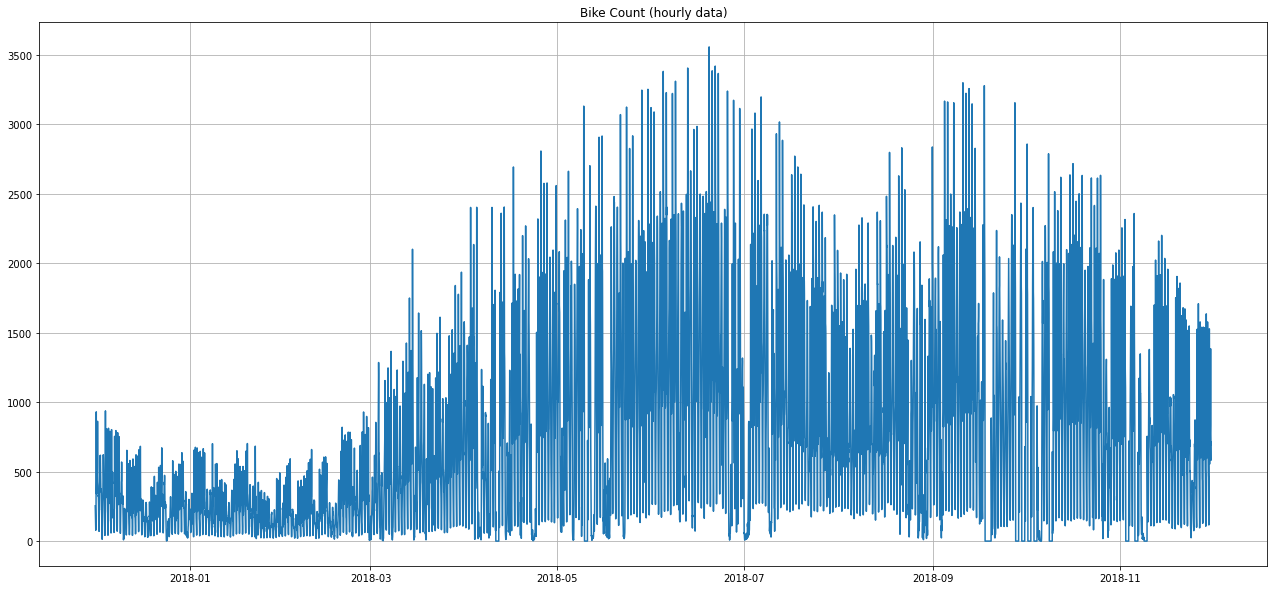

In [ ]:
plt.figure(figsize=(22, 10))
plt.plot(seoul_bike_data1['Rented Bike Count'])
plt.title('Bike Count (hourly data)')
plt.grid(True)
plt.show()

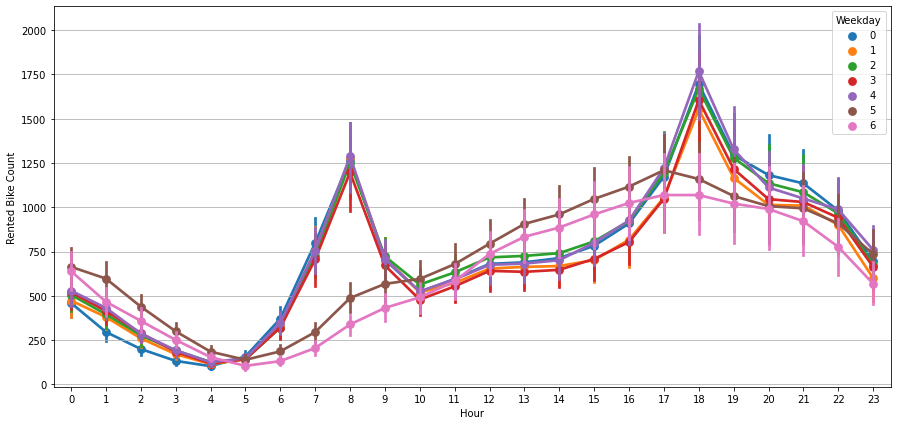

In [40]:
plt.figure(figsize=(15, 7))
plt.grid(True)
sns.pointplot(x= seoul_bike_data1['Hour'], y=seoul_bike_data1['Rented Bike Count'], hue = seoul_bike_data1['Weekday'])

plt.show()
plt.close()

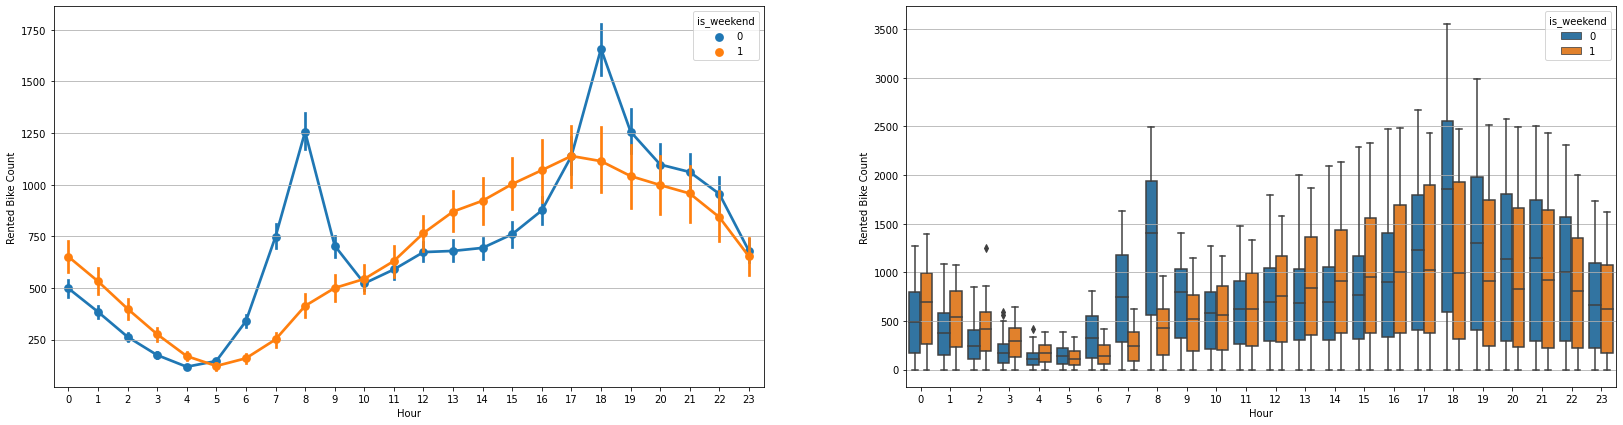

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(28,7))

ax[0].grid(True)
sns.pointplot(x= seoul_bike_data1['Hour'], y=seoul_bike_data1['Rented Bike Count'], hue = seoul_bike_data1['is_weekend'],ax=ax[0])

ax[1].grid(True)
sns.boxplot(x= seoul_bike_data1['Hour'], y=seoul_bike_data1['Rented Bike Count'], hue = seoul_bike_data1['is_weekend'],ax=ax[1])

plt.show()
plt.close()

#### Normal weekdays, i.e. Monday to Friday (0 to 4) behave in a similar pattern through the 24 hours of the day, whereas the weekends, i.e. Saturday & Sunday (5 & 6) behave similary.
#### Hence, demand on normal weekdays is different from that on weekends.

In [7]:
# feature extraction

# adding is_weekend 0/1  catagorical variable
seoul_bike_data1['is_weekend'] = seoul_bike_data1['Weekday'].apply(lambda x : 1 if x in [5,6] else 0)

# converting Functioning Day to binary:
seoul_bike_data1['Functioning Day'] = seoul_bike_data1['Functioning Day'].apply(lambda x : 1 if x =='Yes' else 0)

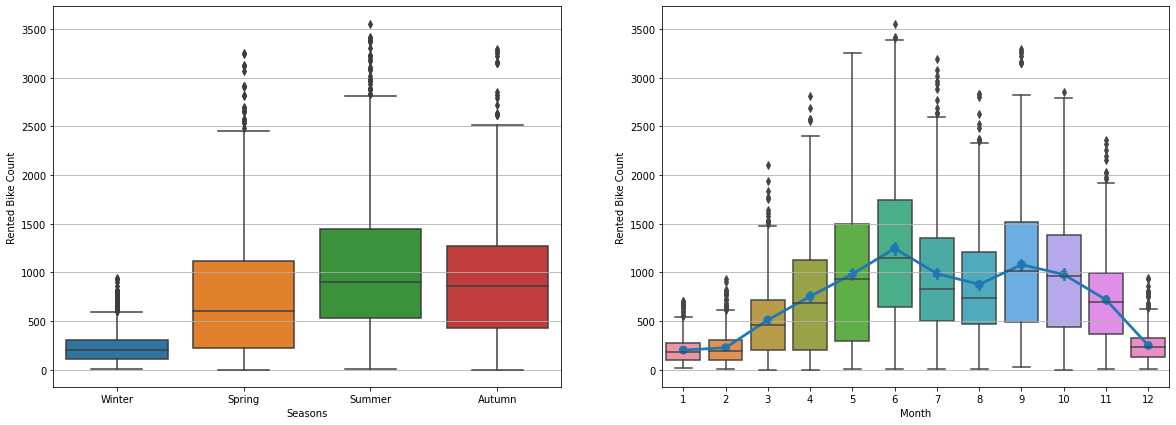

In [175]:
# month wise average demand of bikes:
fig, ax = plt.subplots(1, 2, figsize=(20,7))


ax[1].grid(True)
sns.boxplot(x= seoul_bike_data1['Month'], y=seoul_bike_data1[seoul_bike_data1['Rented Bike Count'] != 0]['Rented Bike Count'],ax=ax[1])
sns.pointplot(x= seoul_bike_data1['Month'], y=seoul_bike_data1[seoul_bike_data1['Rented Bike Count'] != 0]['Rented Bike Count'],ax=ax[1])

ax[0].grid(True)
sns.boxplot(x= seoul_bike_data1['Seasons'], y=seoul_bike_data1[seoul_bike_data1['Rented Bike Count'] != 0]['Rented Bike Count'],ax=ax[0])

plt.show()
plt.close()

* Here we are looking at Month wise average demand for bikes and we can see that the demand varies across months.

* Seeing left plot, there are OUTLIERS on the upper side only, so we should not drop those, because if the demand is high we need somewhat close to those high demand. Even when the demand is low, we might predict more than the actual, which is fine.

* The demand is low in winter season and is highest in the month of June (in summer) and there is also a peak in month of Spetember, which is bit near to June, despite both months belonging to different seasons.
So it will be beneficial to encode the months with level of demand based on the average :

In [9]:
# encoding the months with level of demand based on the monthly average
month_demand_level_df = seoul_bike_data1[seoul_bike_data1['Functioning Day'] != 0].groupby(['Month'])[['Rented Bike Count']].mean().rename(columns = {'Rented Bike Count':'Month Demand Level'}).reset_index()
month_demand_level_df['Month Demand Level'] = month_demand_level_df['Month Demand Level'].apply(lambda x: 1 if 200<= x <400 else (2 if 400<=x<600 else (3 if 600<=x<800 else (4 if 800<=x<1000 else (5 if 1000<=x<1200 else 6) ))))
month_demand_level_df

Month  Month Demand Level
0       1                   1
1       2                   1
2       3                   2
3       4                   3
4       5                   4
5       6                   6
6       7                   4
7       8                   4
8       9                   5
9      10                   4
10     11                   3
11     12                   1

In [10]:
#merging with "month_demand_level_df":
seoul_bike_data1 = pd.merge(seoul_bike_data1,month_demand_level_df,how='left',left_on='Month',right_on='Month')

In [ ]:
seoul_bike_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   int64

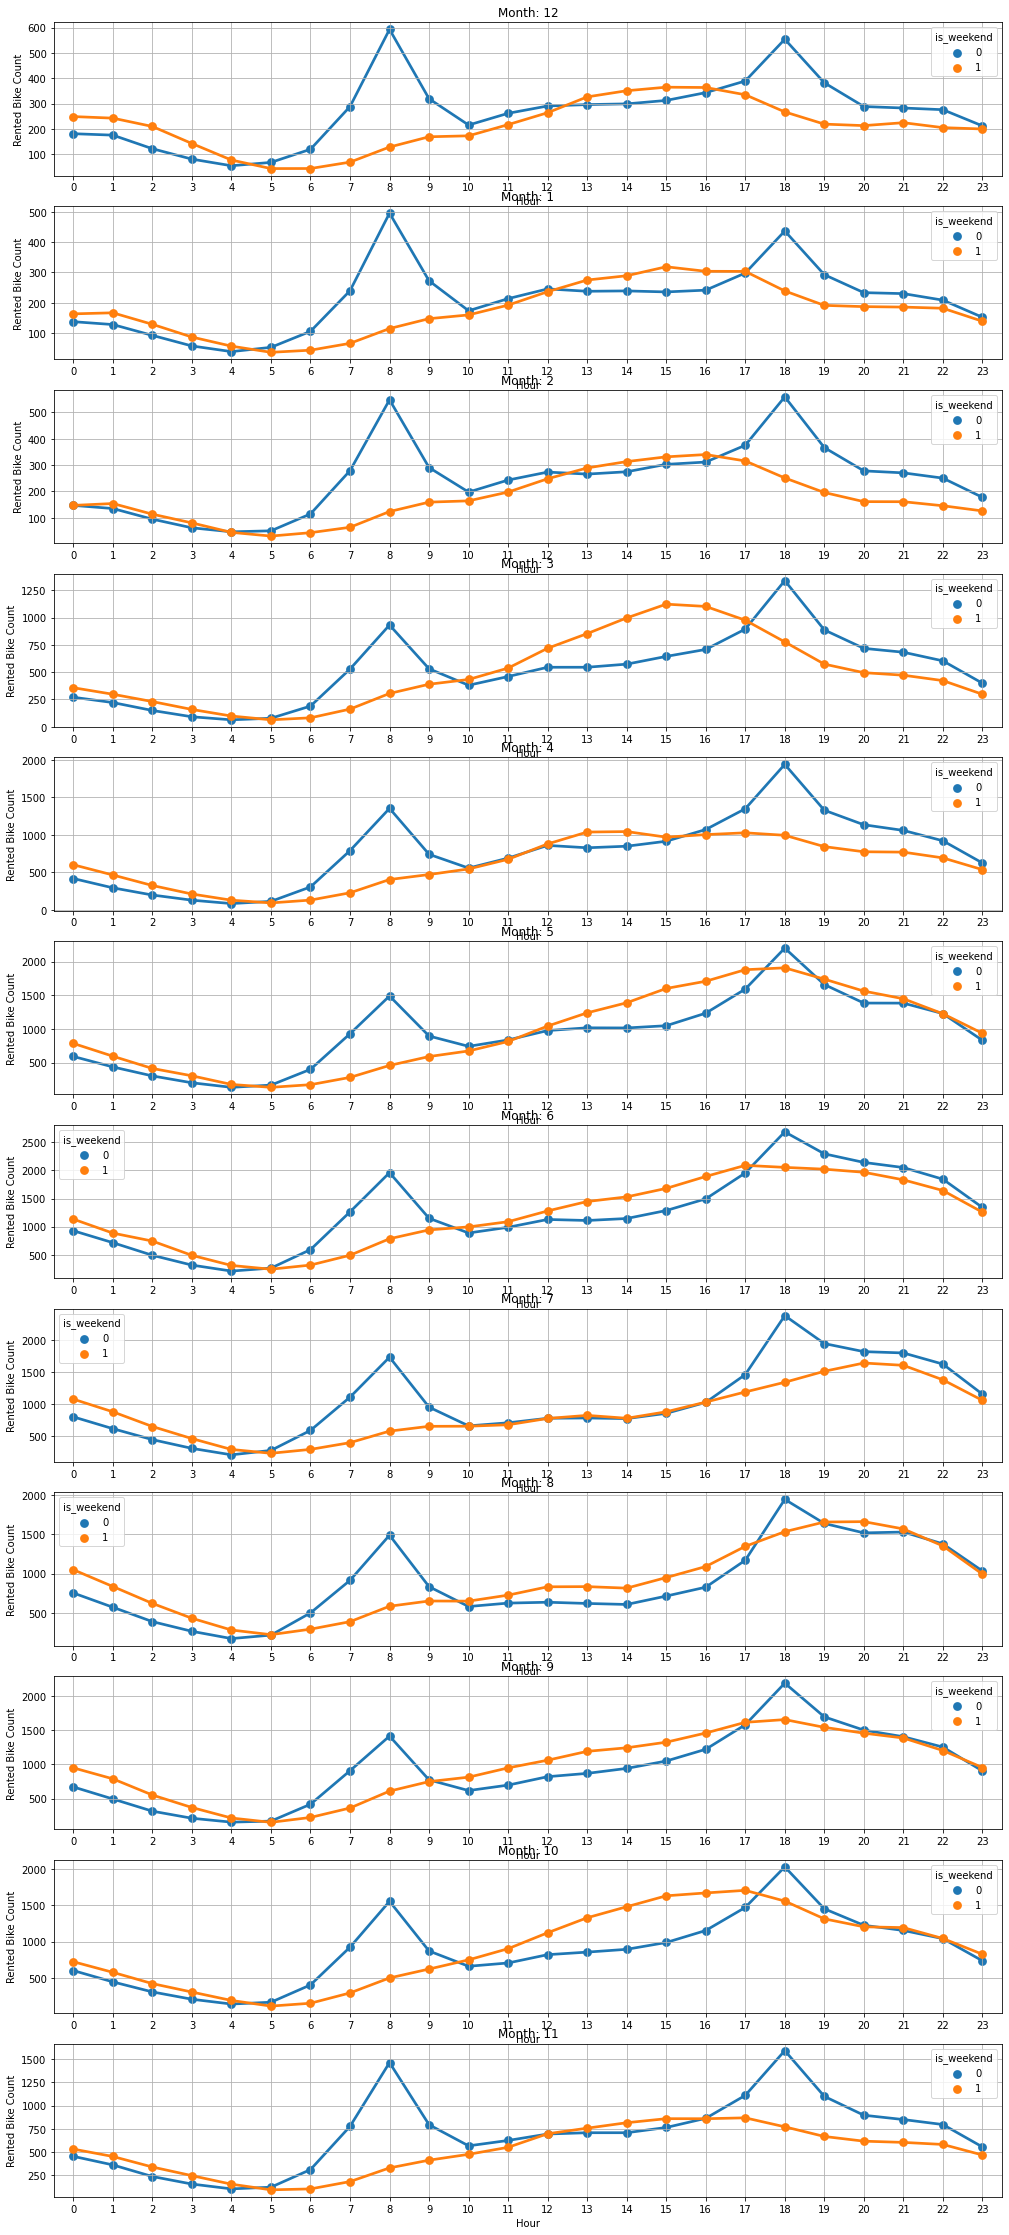

In [ ]:
# month wise hourly demand:

seasonal_df = pd.DataFrame(seoul_bike_data1.groupby(['Month','is_weekend','Hour'])['Rented Bike Count'].mean()).reset_index()

weekdays = [0,1,2,3,4,5,6]

months = [12,1,2,3,4,5,6,7,8,9,10,11] 

fig, ax = plt.subplots(12, 1, figsize=(17,40))

a = 0

for month in months:
  season_df = seasonal_df[seasonal_df['Month'] == month]
  sns.pointplot(x= season_df['Hour'], y=season_df['Rented Bike Count'], hue = season_df['is_weekend'], ax = ax[a])
  ax[a].grid()
  season_name = 'Month: ' + str(month)
  ax[a].set_title(season_name)
  a += 1


#### The relation between hour of day and bike demand for every month is different and non monotonic, i.e. it increases & decreases through the day. So hour variable needs to be converted into bins / window.

In [11]:
#creating hour window

seoul_bike_data1['hour_window'] = seoul_bike_data1['Hour'].apply(lambda x: '0-2' if x in [0,1,2] else ('3-5' if x in [3,4,5] else ('6-8' if x in [6,7,8] else ('9-11' if x in [9,10,11] else ('12-14' if x in [12,13,14] else ('15-17' if x in [15,16,17] else ('18-20' if x in [18,19,20] else'21-23')))))))

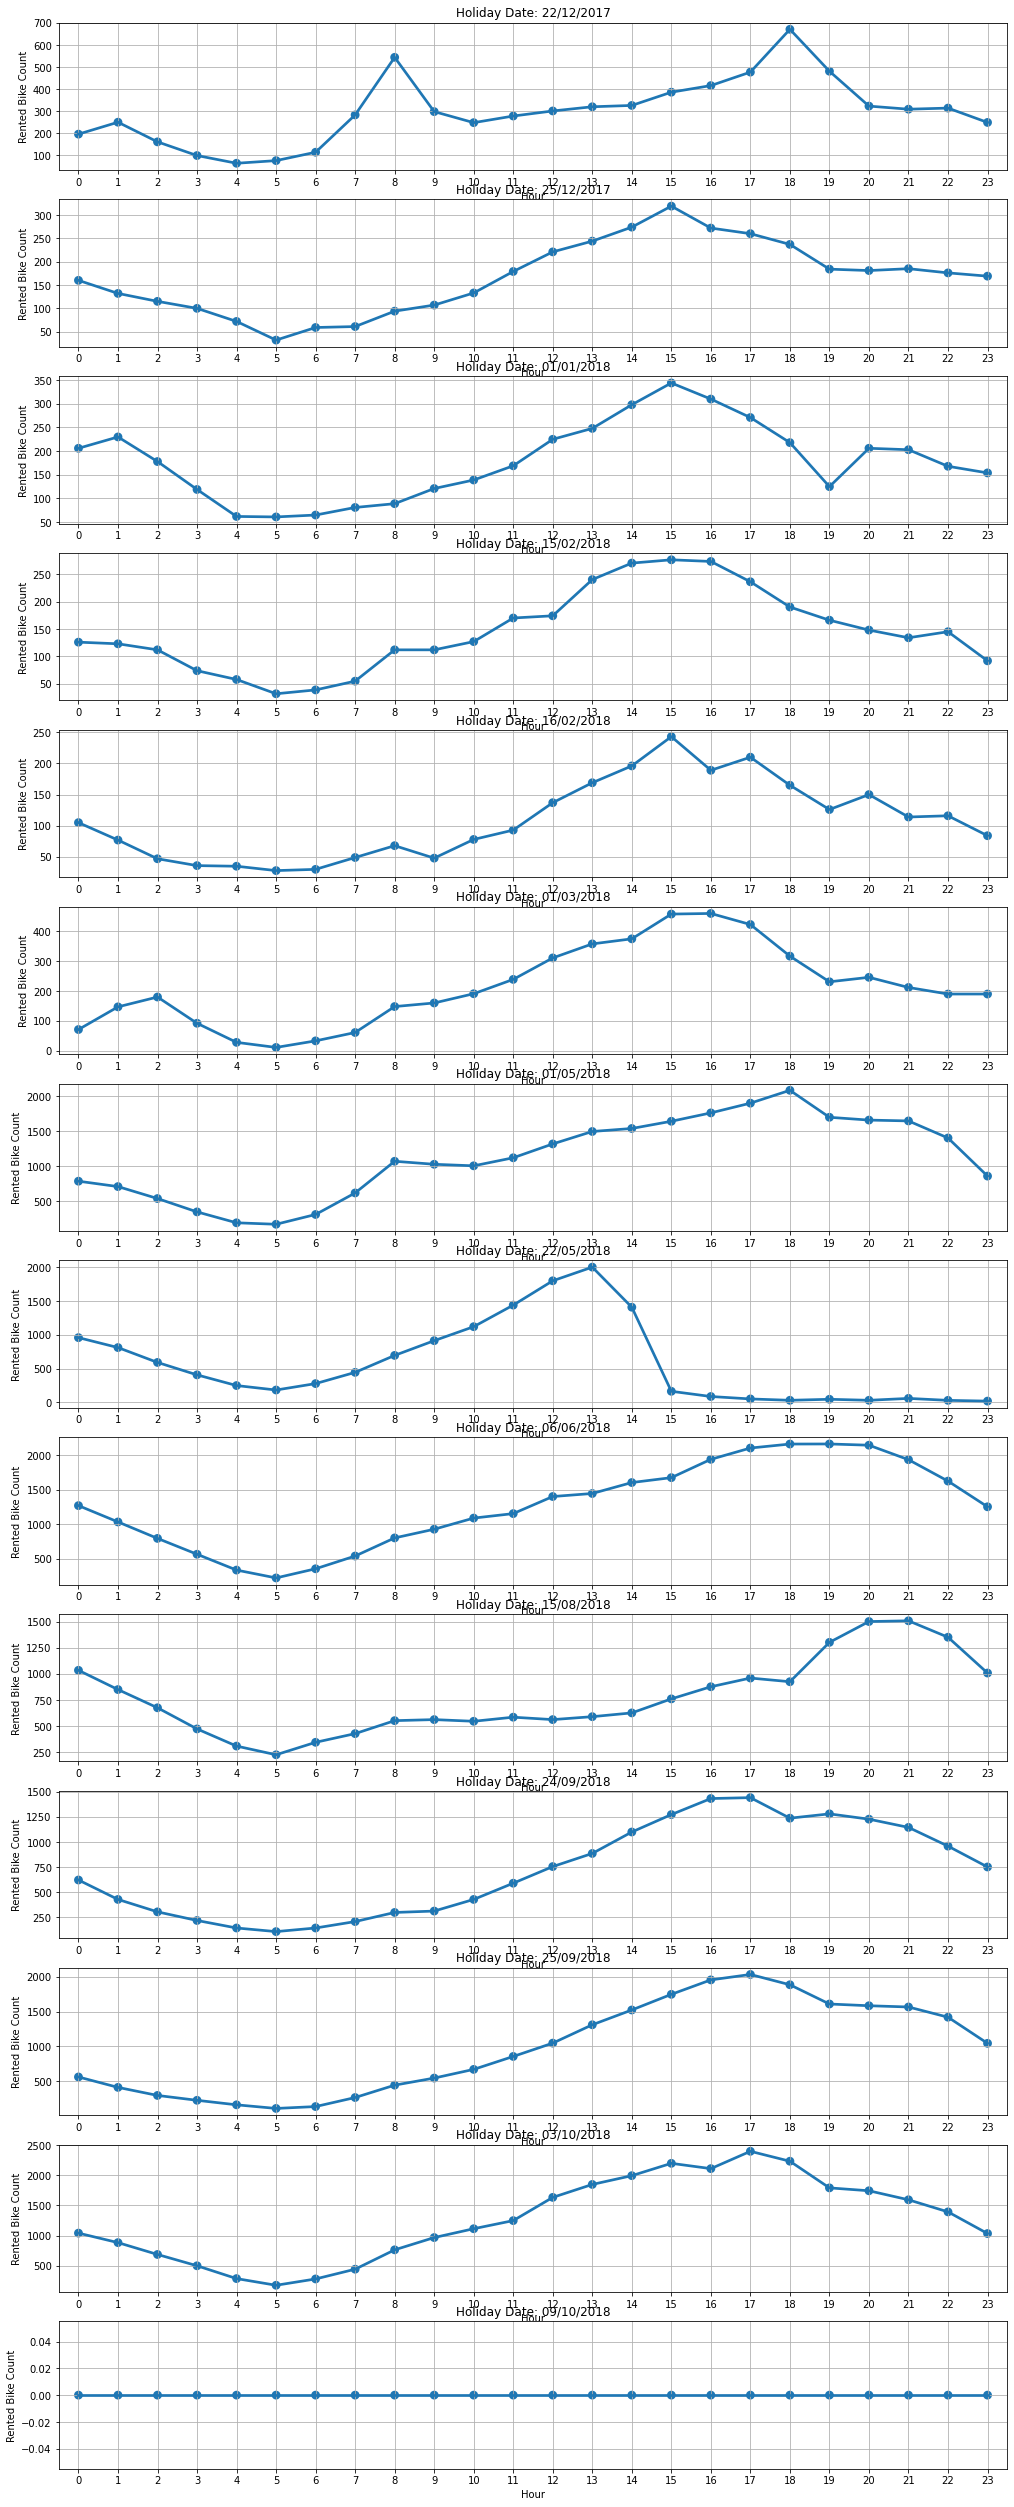

In [ ]:
# exploring demands on holidays:

holidates = list(seoul_bike_data1[(seoul_bike_data1['Holiday']== 'Holiday') & (seoul_bike_data1['is_weekend']== 0)].Date.unique())

fig, ax = plt.subplots(len(holidates), 1, figsize=(17,45))

a = 0

for date in holidates:
  holidate_df = seoul_bike_data1[seoul_bike_data1['Date'] == date]
  sns.pointplot(x= holidate_df['Hour'], y=holidate_df['Rented Bike Count'],  ax = ax[a])
  ax[a].grid()
  season_name = 'Holiday Date: ' + str(date)
  ax[a].set_title(season_name)
  a += 1

* #### Holiday date '22/12/2017' doesn't seem to be a holiday as there are spikes around 8 am and 6 pm like the regular weekdays. This needs to be categorised as 'no holiday'.

* #### The remaining non weekend holidays have the pattern similar to weekends of the respective months they fall into, except for 09/10/2018 which is a 'non functioning day'.

* #### So, we should club these together with weekends, like 'is_holiday_or_weekend', as a binary variable.

In [12]:
# replacing holiday with no-holiday for 22/12/2017:
seoul_bike_data1["Holiday"] = np.where(seoul_bike_data1["Date"] == "22/12/2017", "No Holiday", seoul_bike_data1["Holiday"])

# creating 'is_holiday_or_weekend' binary variable:
seoul_bike_data1['is_weekend_or_holiday'] = seoul_bike_data1['Weekday'].apply(lambda x: 1 if x in [5,6] else 0)
seoul_bike_data1['is_weekend_or_holiday'] = np.where(seoul_bike_data1['Holiday'] == 'Holiday', 1,seoul_bike_data1['is_weekend_or_holiday'])

In [53]:
numeric_features = seoul_bike_data1.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Functioning Day', 'Year', 'Month', 'Weekday', 'Week', 'is_weekend',
       'Month Demand Level', 'is_weekend_or_holiday'],
      dtype='object')

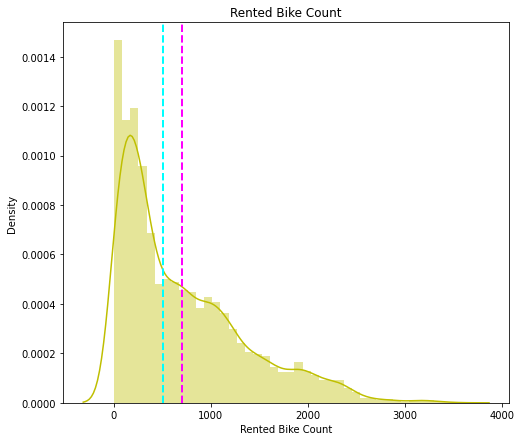

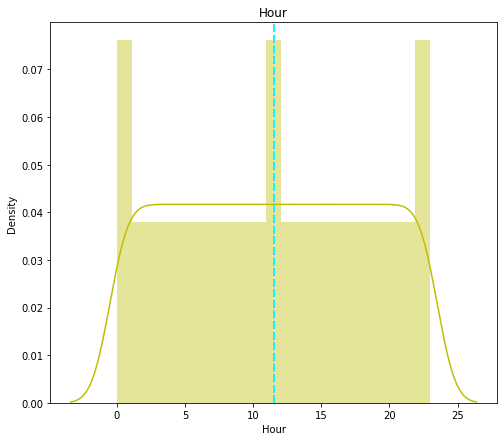

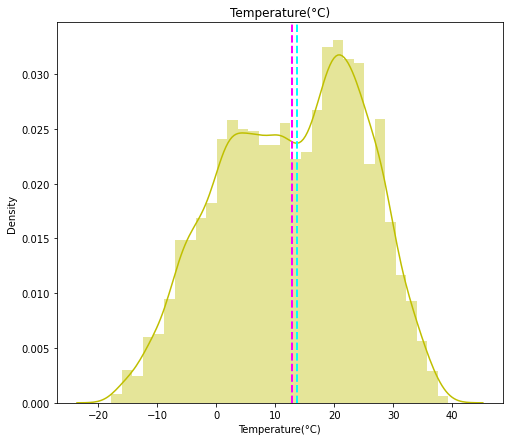

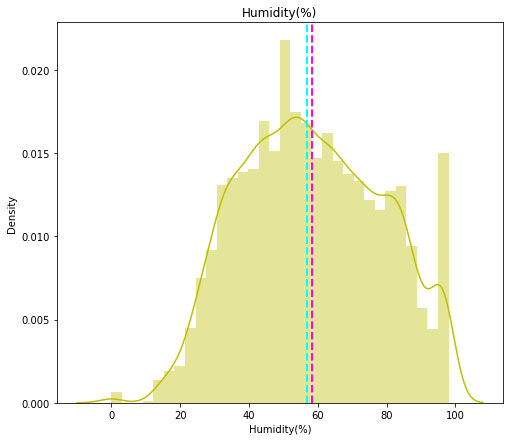

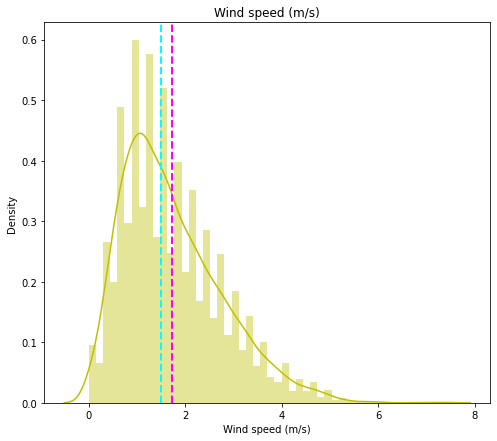

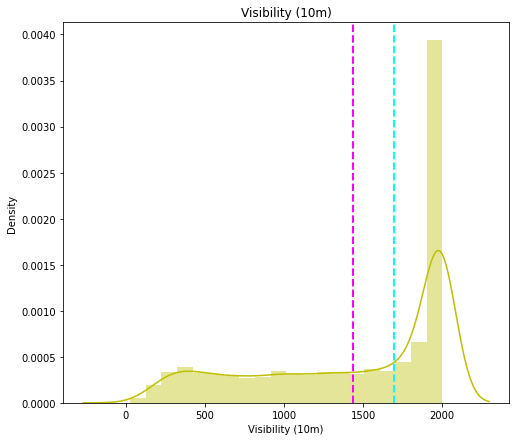

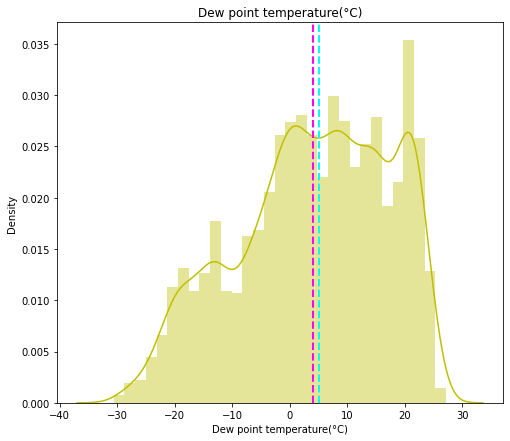

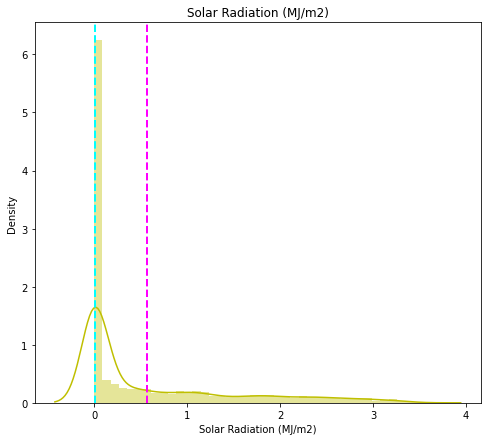

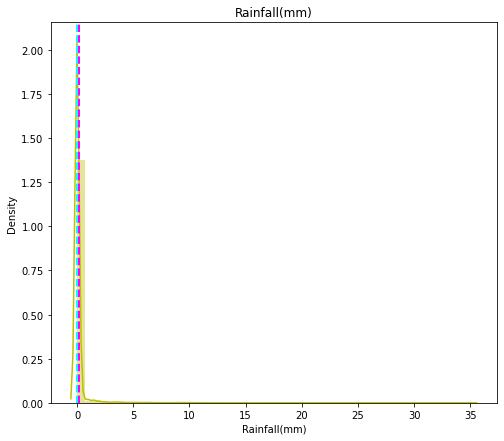

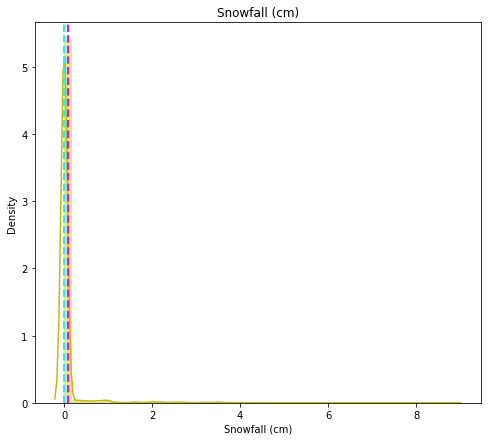

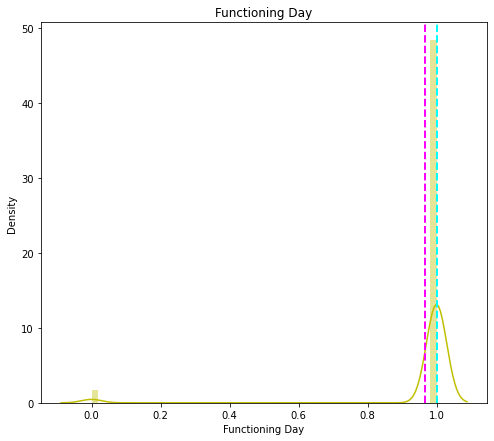

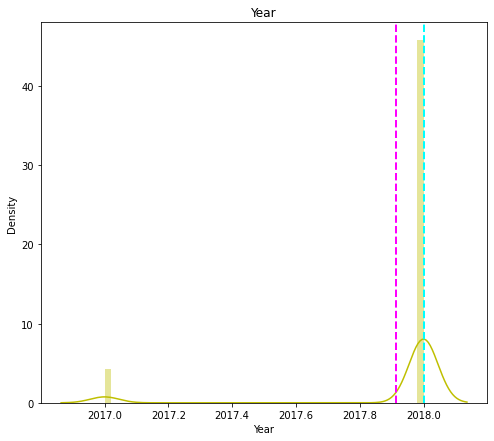

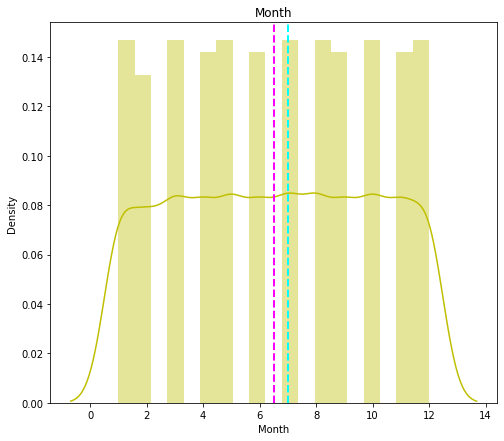

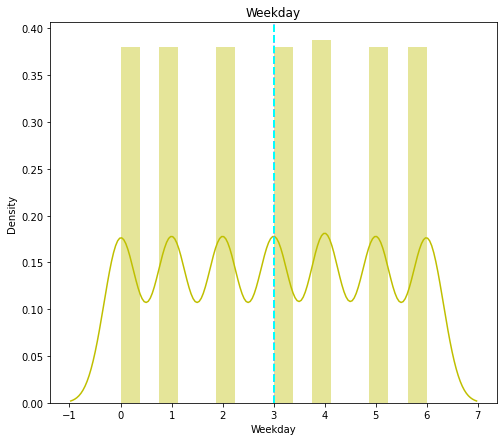

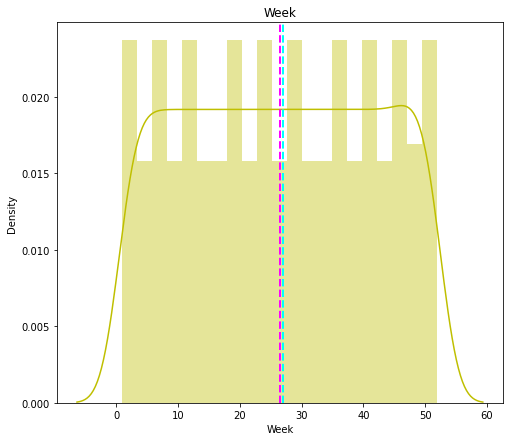

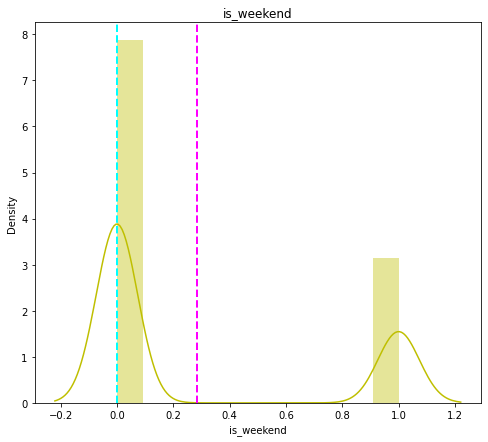

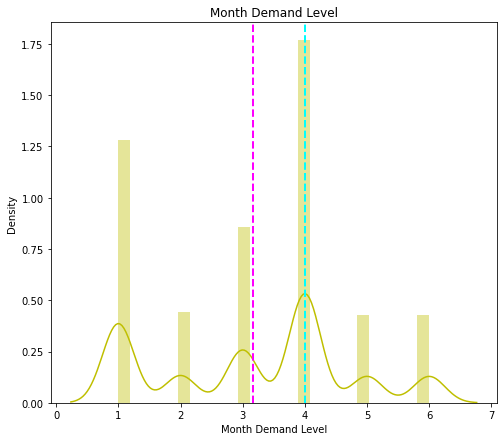

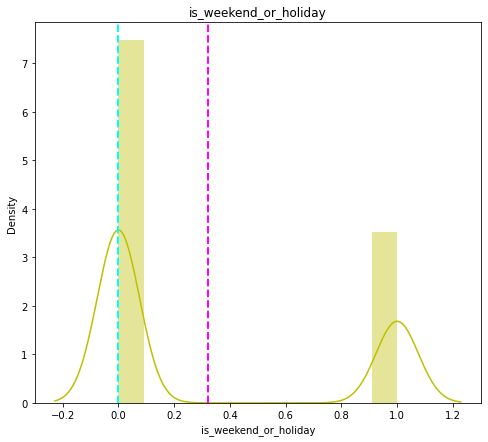

In [60]:
for col in numeric_features:
    plt.figure(figsize=(8, 7))

    sns.distplot(seoul_bike_data1[col],color="y")
    plt.axvline(seoul_bike_data1[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(seoul_bike_data1[col].median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.title(col)


plt.show()

* #### Rented Bike Count, Wind Speed, Visibility, Solar radiation, Rainfall and Snowfall are not normally distributed.

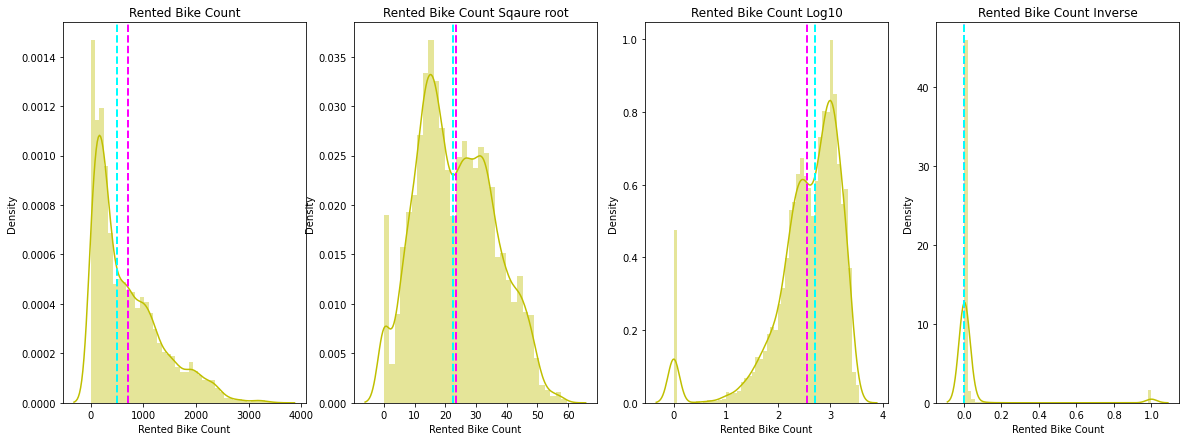

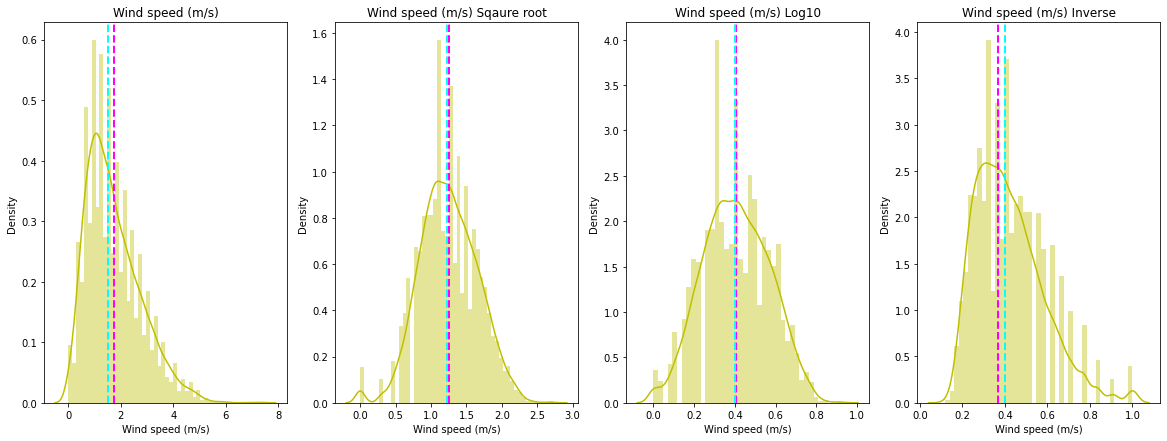

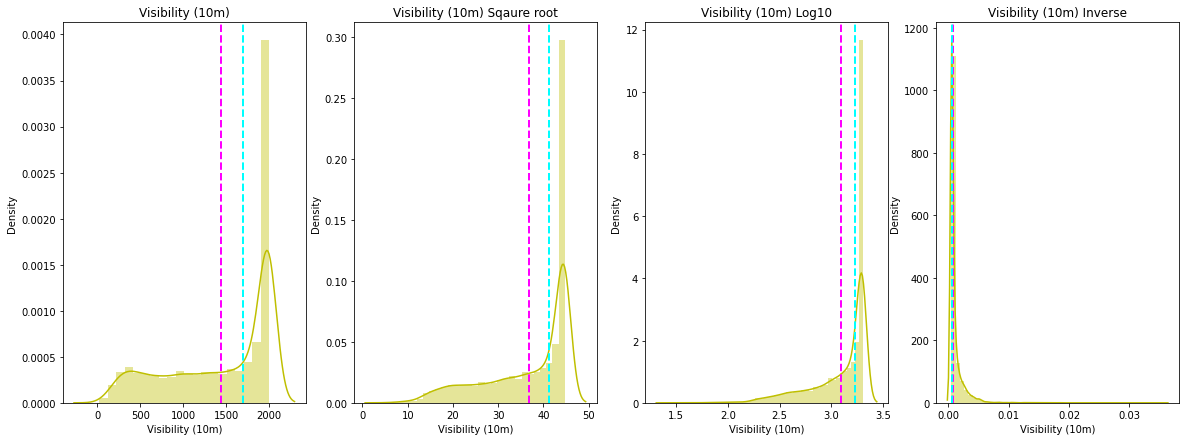

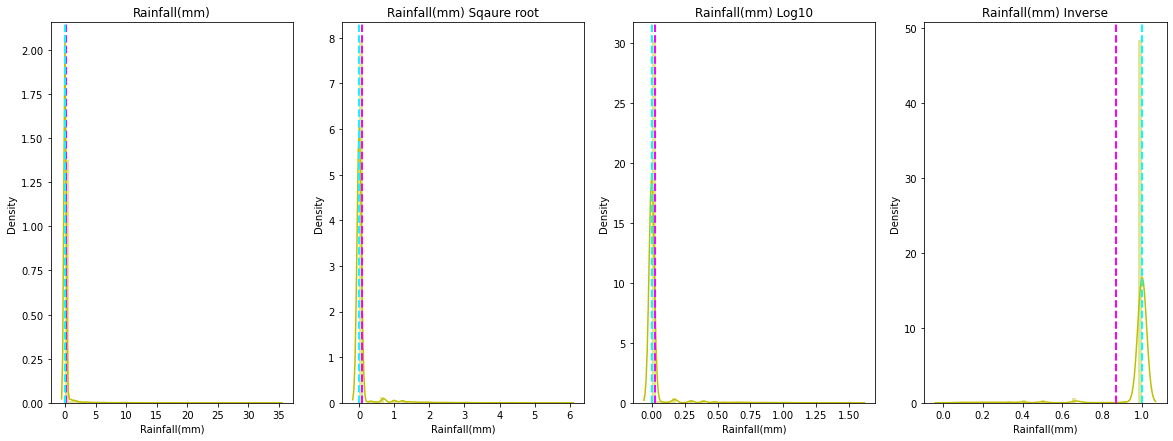

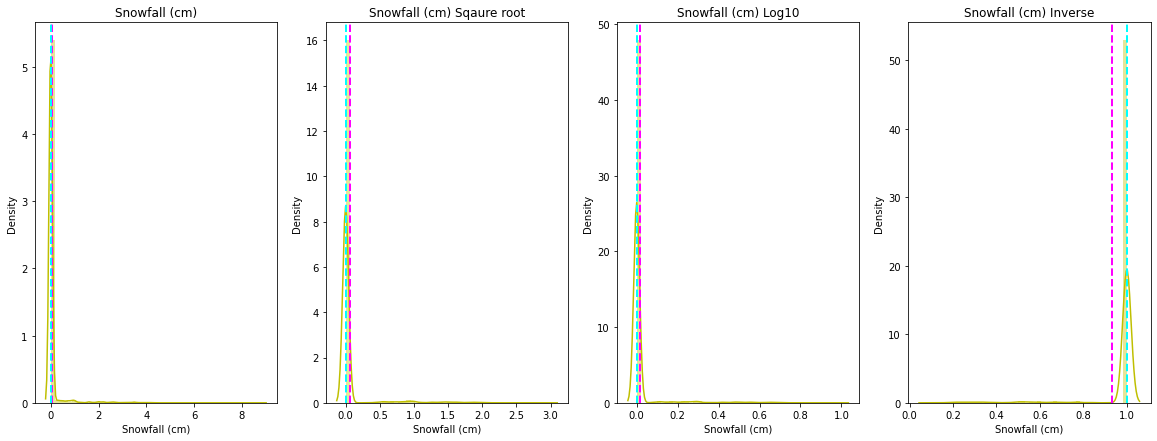

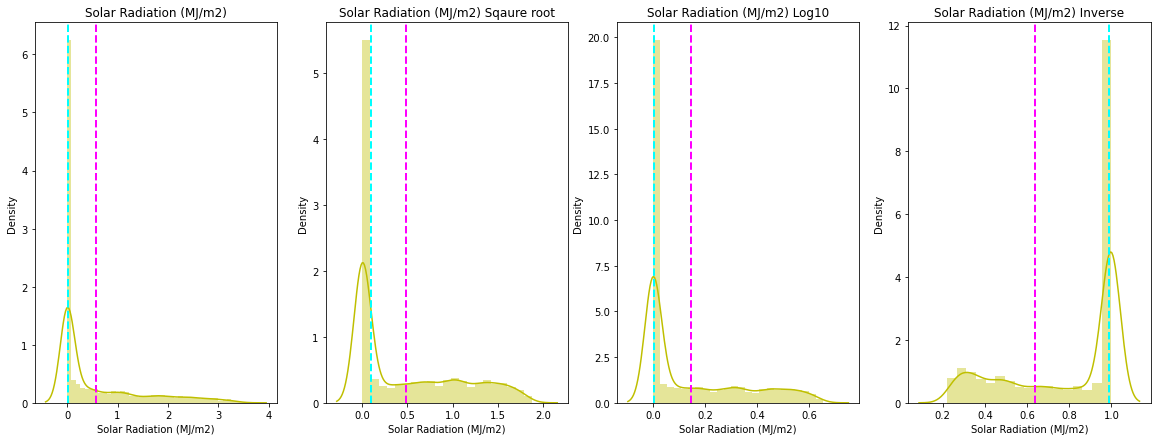

In [79]:
for col in ['Rented Bike Count','Wind speed (m/s)','Visibility (10m)','Rainfall(mm)','Snowfall (cm)','Solar Radiation (MJ/m2)']:
    fig, ax = plt.subplots(1, 4, figsize=(20,7))

    sns.distplot(seoul_bike_data1[col],color="y",ax=ax[0])
    ax[0].axvline(seoul_bike_data1[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[0].axvline(seoul_bike_data1[col].median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax[0].set_title(col)

    #square root transformation
    sns.distplot(np.sqrt(seoul_bike_data1[col]),ax=ax[1],color="y")
    ax[1].axvline(np.sqrt(seoul_bike_data1[col]).mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[1].axvline(np.sqrt(seoul_bike_data1[col]).median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax[1].set_title(col + ' Sqaure root')

    # log 10 transformation
    sns.distplot(np.log10(seoul_bike_data1[col]+1),ax=ax[2],color="y")
    ax[2].axvline(np.log10(seoul_bike_data1[col]+1).mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[2].axvline(np.log10(seoul_bike_data1[col]+1).median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax[2].set_title(col + ' Log10')

    # inverse transformation
    sns.distplot(1/(seoul_bike_data1[col]+1),ax=ax[3],color="y")
    ax[3].axvline(1/(seoul_bike_data1[col]+1).mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[3].axvline(1/(seoul_bike_data1[col]+1).median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax[3].set_title(col + ' Inverse')

plt.show()

* #### Plotting Rented Bike Count and Rented Bike Count(Sqaure root) VS Numeric features. Reason for square root- it gives best normality to 'Rented Bike Count'.

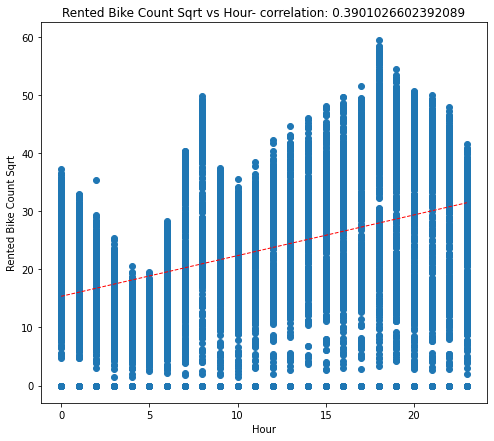

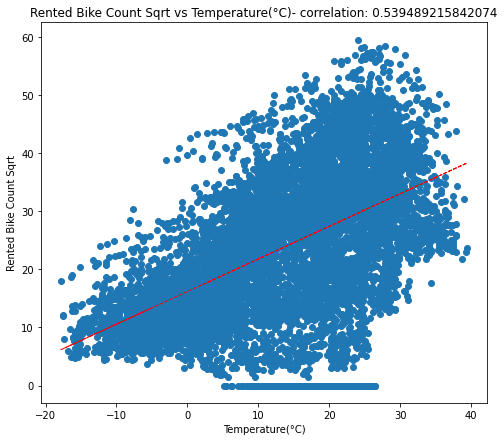

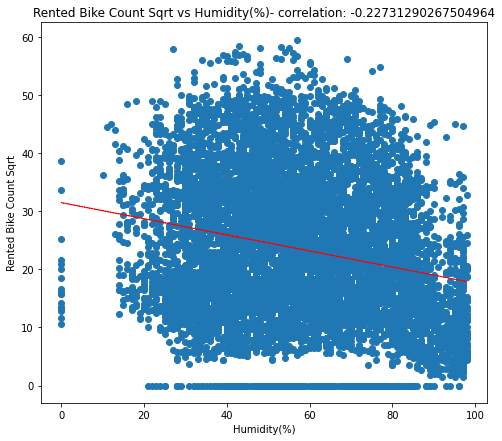

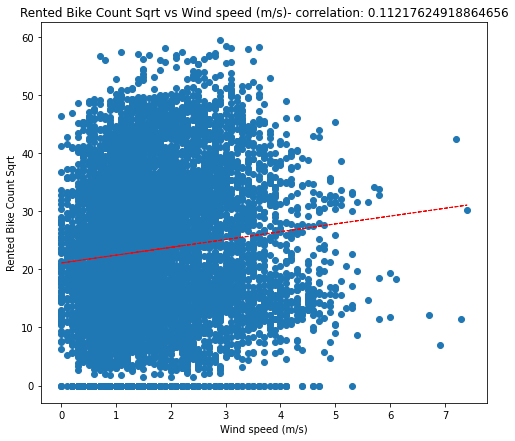

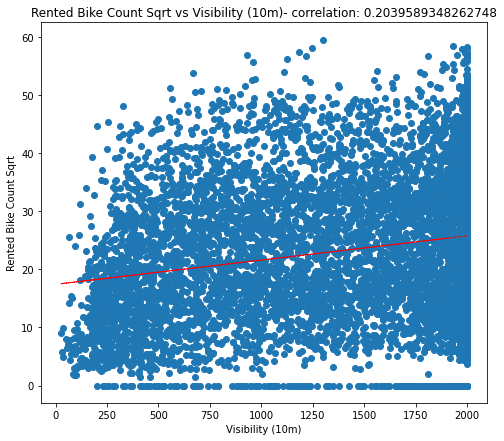

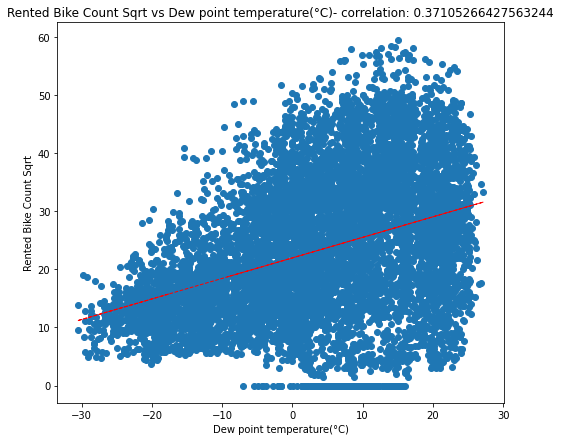

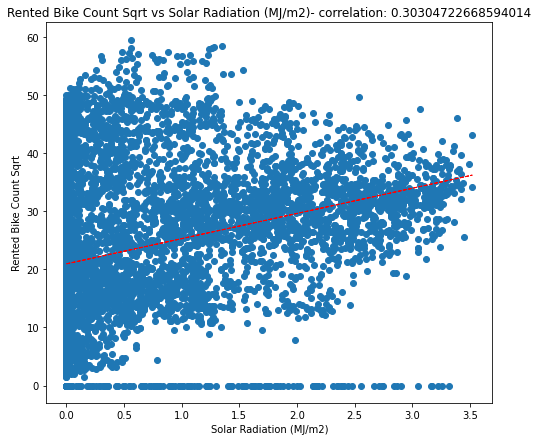

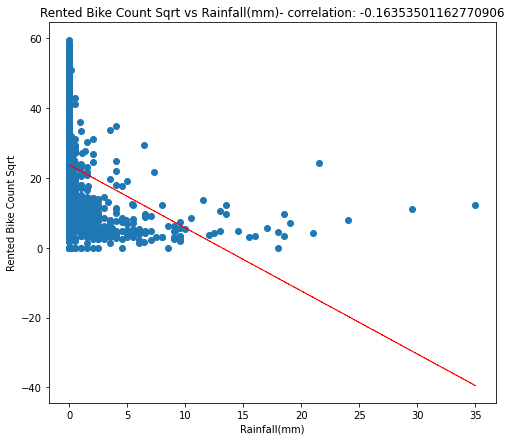

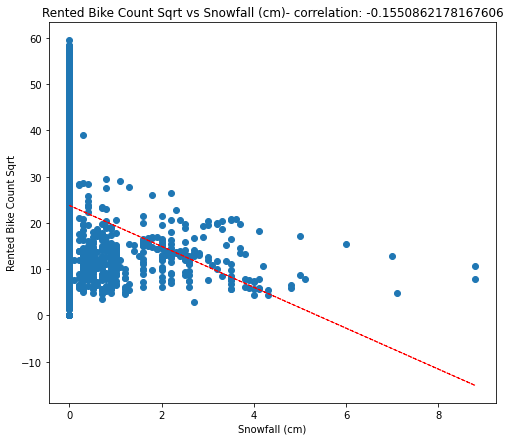

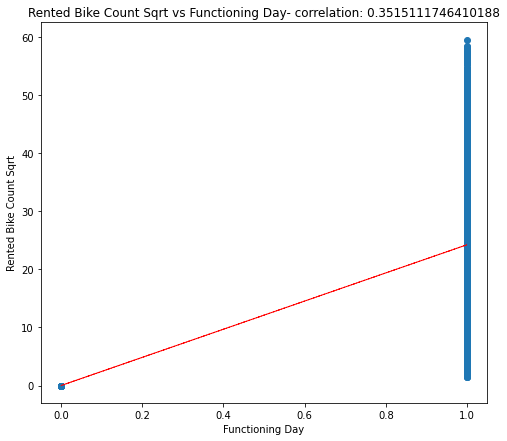

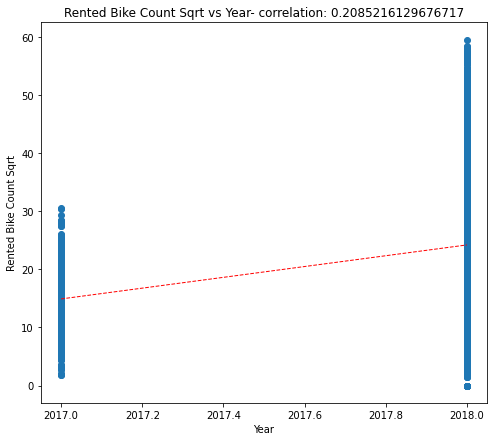

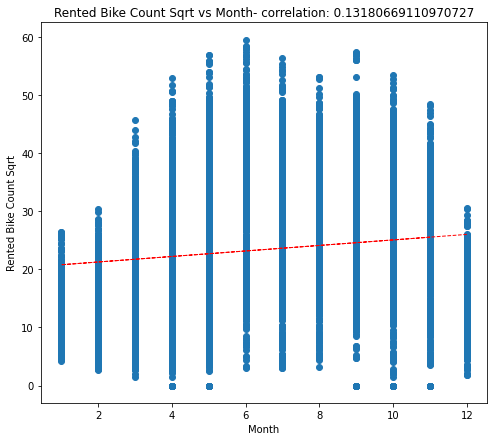

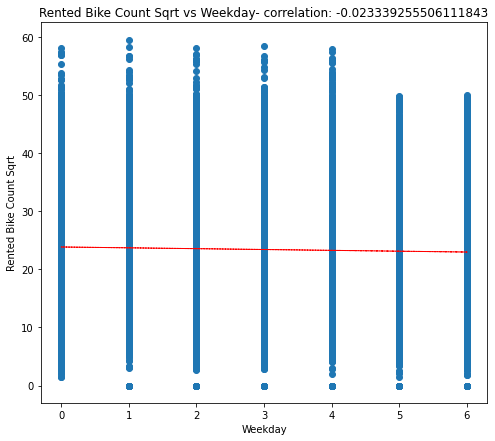

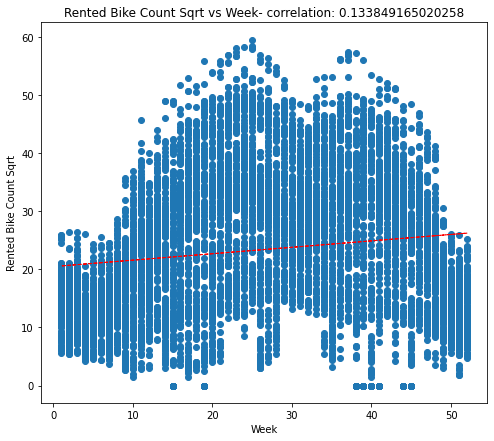

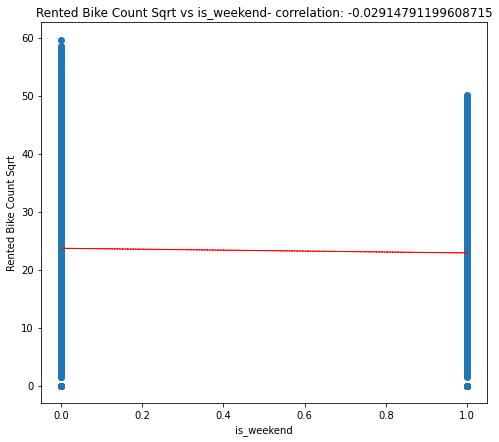

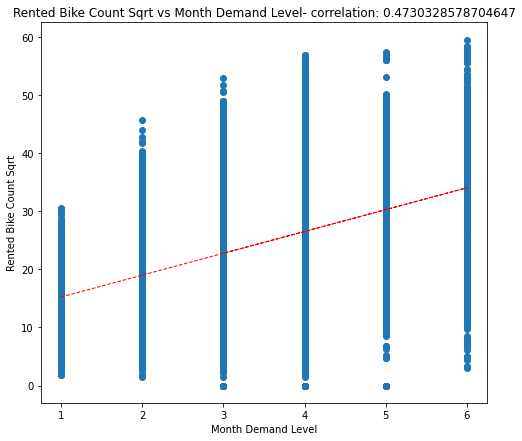

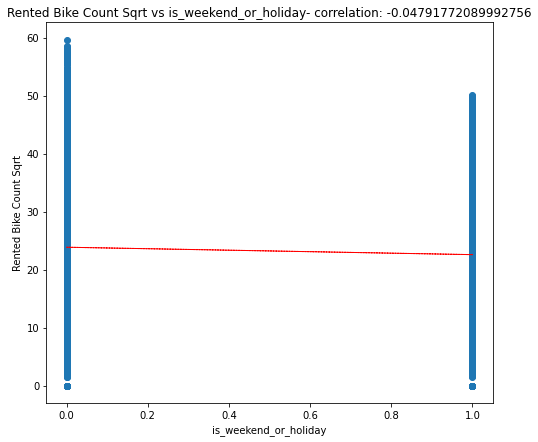

In [81]:
#Rented Bike Count and Rented Bike Count(Sqaure root) VS Numeric features

for col in numeric_features[1:]:
    plt.figure(figsize=(8, 7))
    
    feature = seoul_bike_data1[col]
    label1 = np.sqrt(seoul_bike_data1['Rented Bike Count'])
    correlation = feature.corr(label1)
    plt.scatter(x=feature, y=label1)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count Sqrt')
    plt.title('Rented Bike Count Sqrt vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(seoul_bike_data1[col], np.sqrt(seoul_bike_data1['Rented Bike Count']), 1)
    y_hat = np.poly1d(z)(seoul_bike_data1[col])

    plt.plot(seoul_bike_data1[col], y_hat, "r--", lw=1)

plt.show()

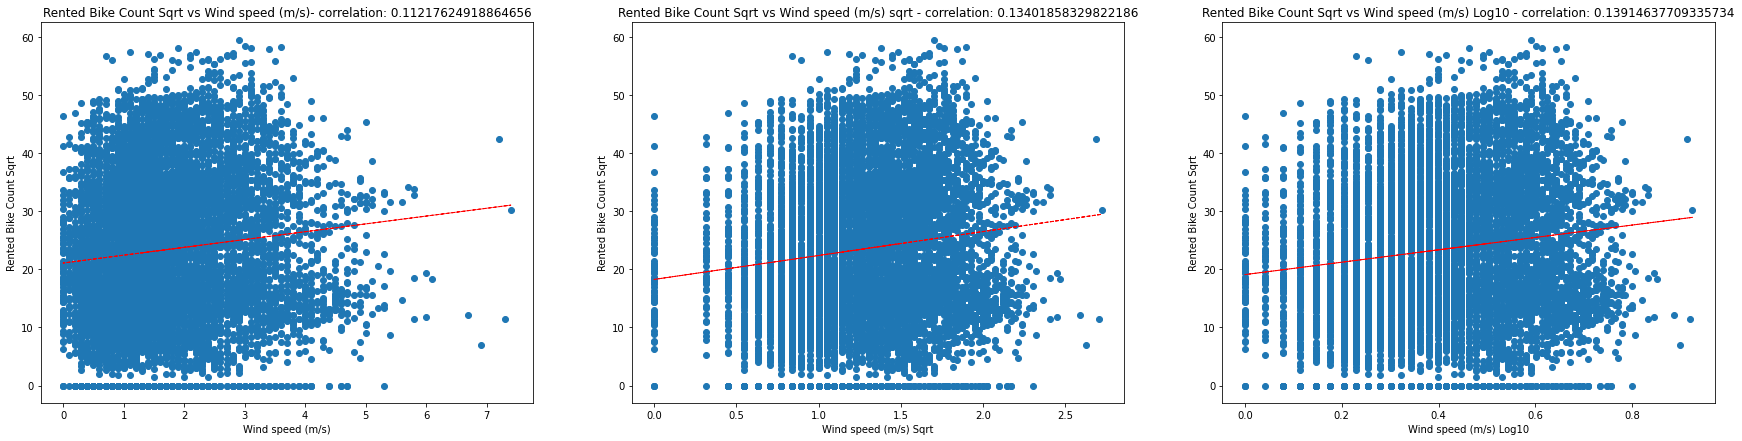

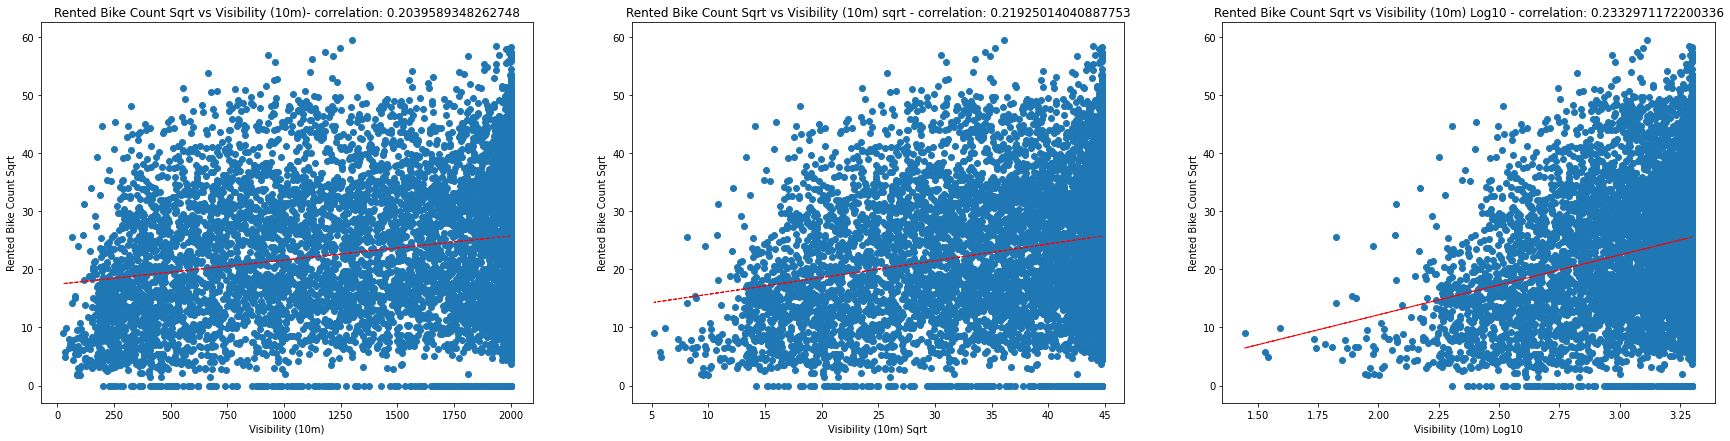

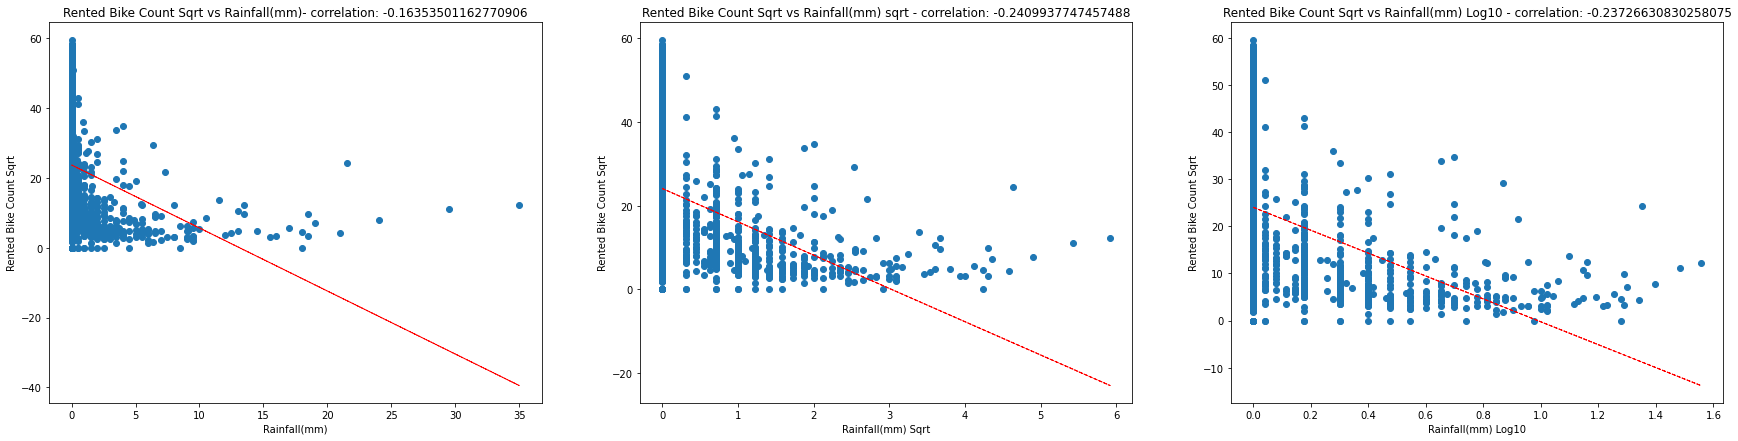

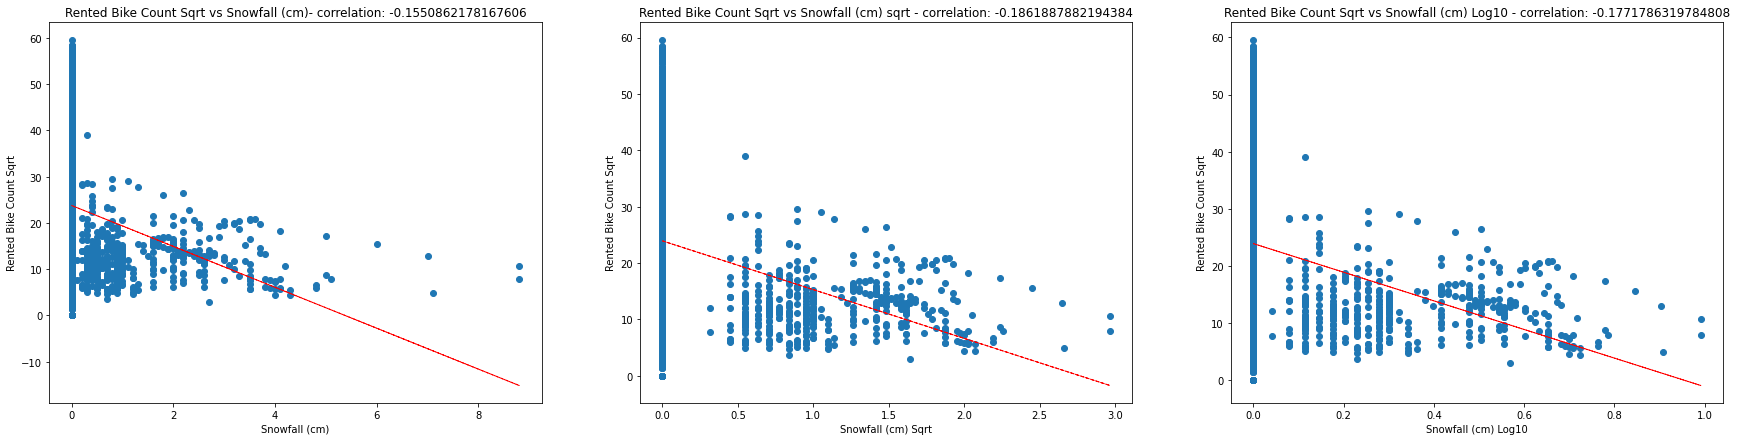

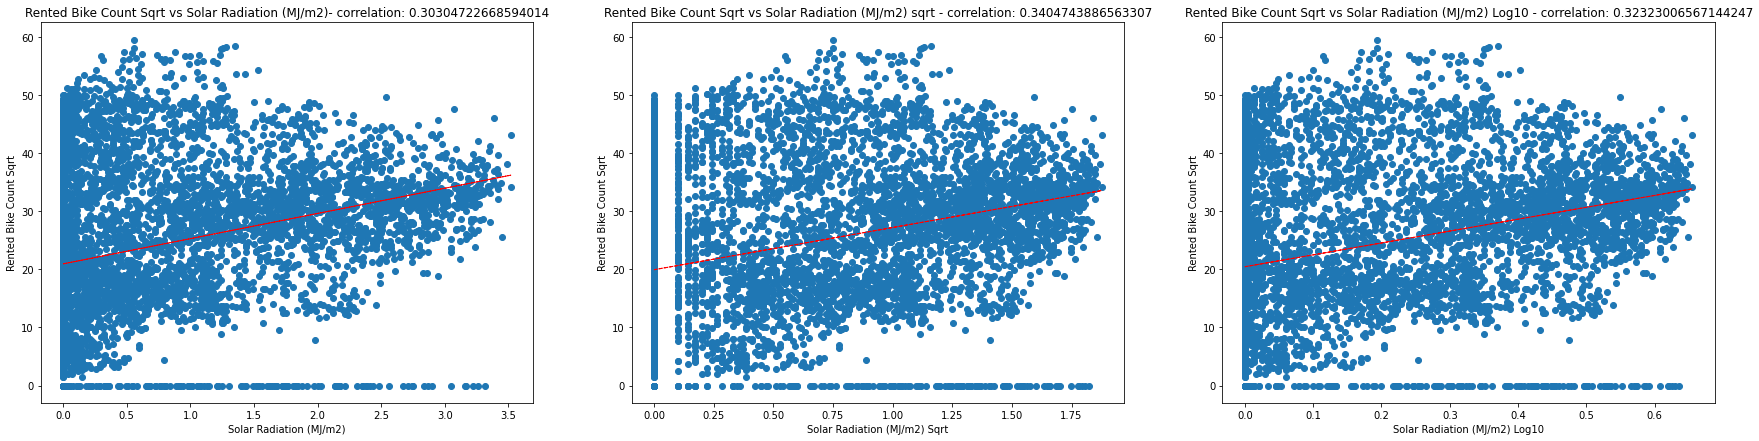

In [89]:
#Rented Bike Count and Rented Bike Count(Sqaure root) VS TRANSFORMED Numeric features

for col in ['Wind speed (m/s)','Visibility (10m)','Rainfall(mm)','Snowfall (cm)','Solar Radiation (MJ/m2)']:
    fig, ax = plt.subplots(1, 3, figsize=(30,7))
    
    feature1 = seoul_bike_data1[col]
    label1 = np.sqrt(seoul_bike_data1['Rented Bike Count'])
    correlation = feature1.corr(label1)
    ax[0].scatter(x=feature1, y=label1)
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Rented Bike Count Sqrt')
    ax[0].set_title('Rented Bike Count Sqrt vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(seoul_bike_data1[col], np.sqrt(seoul_bike_data1['Rented Bike Count']), 1)
    y_hat = np.poly1d(z)(seoul_bike_data1[col])

    ax[0].plot(seoul_bike_data1[col], y_hat, "r--", lw=1)

    feature2 = np.sqrt(seoul_bike_data1[col])
    label1 = np.sqrt(seoul_bike_data1['Rented Bike Count'])
    correlation = feature2.corr(label1)
    ax[1].scatter(x=feature2, y=label1)
    ax[1].set_xlabel(col+' Sqrt')
    ax[1].set_ylabel('Rented Bike Count Sqrt')
    ax[1].set_title('Rented Bike Count Sqrt vs ' + col + ' sqrt - correlation: ' + str(correlation))
    z = np.polyfit(np.sqrt(seoul_bike_data1[col]), np.sqrt(seoul_bike_data1['Rented Bike Count']), 1)
    y_hat = np.poly1d(z)(np.sqrt(seoul_bike_data1[col]))

    ax[1].plot(np.sqrt(seoul_bike_data1[col]), y_hat, "r--", lw=1)


    feature3 = np.log10(seoul_bike_data1[col] + 1)
    label1 = np.sqrt(seoul_bike_data1['Rented Bike Count'])
    correlation = feature3.corr(label1)
    ax[2].scatter(x=feature3, y=label1)
    ax[2].set_xlabel(col+' Log10')
    ax[2].set_ylabel('Rented Bike Count Sqrt')
    ax[2].set_title('Rented Bike Count Sqrt vs ' + col + ' Log10 - correlation: ' + str(correlation))
    z = np.polyfit(np.log10(seoul_bike_data1[col] + 1), np.sqrt(seoul_bike_data1['Rented Bike Count']), 1)
    y_hat = np.poly1d(z)(np.log10(seoul_bike_data1[col] + 1))

    ax[2].plot(np.log10(seoul_bike_data1[col]+1), y_hat, "r--", lw=1)

plt.show()

* #### The correlation improves slightly on using transformed features with 'Rented Bike Sqrt' but is similar for both Square root and log10 transformation. Square root transformation will be applied for simplicity purposes.
* #### We need to split the data first and then apply repective transformations on both train and test set, in order to avoid data leakage.

In [120]:
X = seoul_bike_data1.copy()
Y = np.sqrt(seoul_bike_data1['Rented Bike Count']).copy()

In [121]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( X,Y , test_size = 0.30,shuffle = True ,random_state = 3) 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6132, 22)
(2628, 22)
(6132,)
(2628,)


In [122]:
# APPLYING SQUARE ROOT TRANFORMATIONS:

# train set
x_train['Wind speed (m/s) sqrt'] = np.sqrt(x_train['Wind speed (m/s)'])
x_train['Rainfall(mm) sqrt'] = np.sqrt(x_train['Rainfall(mm)'])
x_train['Snowfall (cm) sqrt'] = np.sqrt(x_train['Snowfall (cm)'])
x_train['Solar Radiation (MJ/m2) sqrt'] = np.sqrt(x_train['Solar Radiation (MJ/m2)'])
x_train['Visibility (10m) sqrt'] = np.sqrt(x_train['Visibility (10m)'])
x_train['Rented Bike Count Sqrt'] = np.sqrt(x_train['Rented Bike Count'])


#test set
x_test['Wind speed (m/s) sqrt'] = np.sqrt(x_test['Wind speed (m/s)'])
x_test['Rainfall(mm) sqrt'] = np.sqrt(x_test['Rainfall(mm)'])
x_test['Snowfall (cm) sqrt'] = np.sqrt(x_test['Snowfall (cm)'])
x_test['Solar Radiation (MJ/m2) sqrt'] = np.sqrt(x_test['Solar Radiation (MJ/m2)'])
x_test['Visibility (10m) sqrt'] = np.sqrt(x_test['Visibility (10m)'])
x_test['Rented Bike Count Sqrt'] = np.sqrt(x_test['Rented Bike Count'])

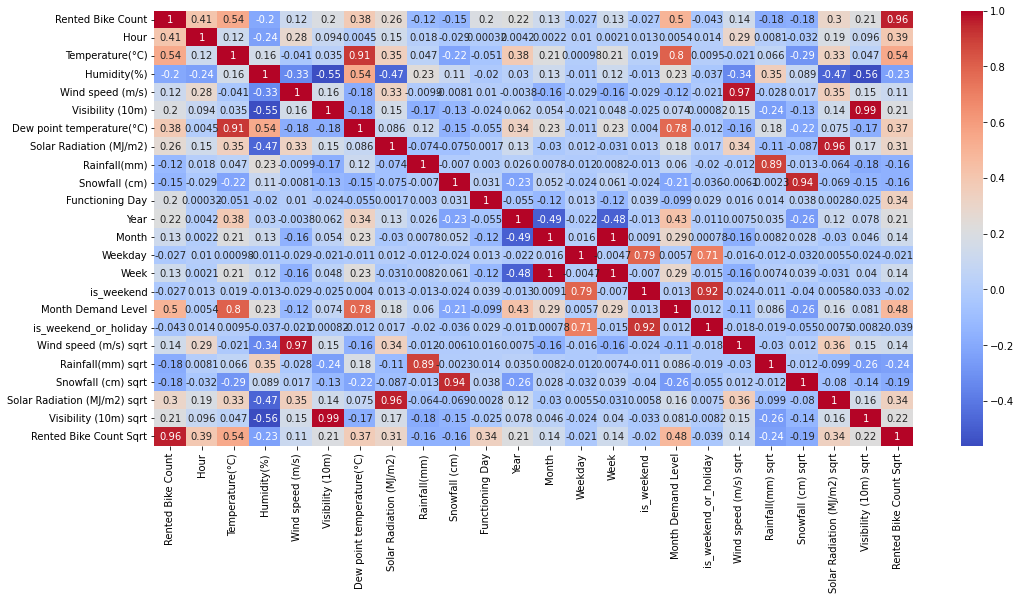

In [93]:
# CORRELATION CHART:
plt.figure(figsize=(17,8))
correlation = x_train.corr()
sns.heatmap((correlation), annot=True, cmap='coolwarm')

In [94]:
x_train.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Functioning Day', 'Year', 'Month', 'Weekday', 'Week', 'is_weekend',
       'Month Demand Level', 'is_weekend_or_holiday', 'Wind speed (m/s) sqrt',
       'Rainfall(mm) sqrt', 'Snowfall (cm) sqrt',
       'Solar Radiation (MJ/m2) sqrt', 'Visibility (10m) sqrt',
       'Rented Bike Count Sqrt'],
      dtype='object')

In [106]:
#Multicollinearity check via VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(x_train[[i for i in x_train.describe().columns if i not in ['Rented Bike Count','Rented Bike Count Sqrt','Dew point temperature(°C)', 'Year',
       'Month', 'Weekday', 'Week', 'is_weekend','is_weekend_or_holiday','Wind speed (m/s)','Rainfall(mm)','Snowfall (cm)','Visibility (10m) sqrt','Hour','Month Demand Level','Solar Radiation (MJ/m2)','Wind speed (m/s) sqrt','Functioning Day']]])

variables       VIF
0               Temperature(°C)  3.126486
1                   Humidity(%)  4.414253
2              Visibility (10m)  3.728786
3             Rainfall(mm) sqrt  1.187810
4            Snowfall (cm) sqrt  1.187429
5  Solar Radiation (MJ/m2) sqrt  2.078546

In [ ]:
x_train.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Month', 'Weekday', 'Week',
       'is_weekend', 'Month Demand Level', 'hour_window',
       'is_weekend_or_holiday', 'Wind speed (m/s) sqrt', 'Rainfall(mm) sqrt',
       'Snowfall (cm) sqrt', 'Solar Radiation (MJ/m2) sqrt',
       'Rented Bike Count Sqrt'],
      dtype='object')

In [123]:
num_features = ['Temperature(°C)','Visibility (10m)','Rainfall(mm) sqrt','Snowfall (cm) sqrt','Solar Radiation (MJ/m2) sqrt','Humidity(%)']

In [124]:
# getting one hot encodings
x_train_enc = x_train.copy()

x_train_enc = pd.get_dummies(x_train_enc, columns=["Month Demand Level","hour_window"], 
                            prefix=["Month Demand Level","hour_window"])

x_test_enc = x_test.copy()
x_test_enc = pd.get_dummies(x_test_enc, columns=["Month Demand Level","hour_window"], 
                            prefix=["Month Demand Level","hour_window"])

In [125]:
x_train_enc.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Month', 'Weekday', 'Week',
       'is_weekend', 'is_weekend_or_holiday', 'Wind speed (m/s) sqrt',
       'Rainfall(mm) sqrt', 'Snowfall (cm) sqrt',
       'Solar Radiation (MJ/m2) sqrt', 'Visibility (10m) sqrt',
       'Rented Bike Count Sqrt', 'Month Demand Level_1',
       'Month Demand Level_2', 'Month Demand Level_3', 'Month Demand Level_4',
       'Month Demand Level_5', 'Month Demand Level_6', 'hour_window_0-2',
       'hour_window_12-14', 'hour_window_15-17', 'hour_window_18-20',
       'hour_window_21-23', 'hour_window_3-5', 'hour_window_6-8',
       'hour_window_9-11'],
      dtype='object')

In [126]:
#categorical features:
categorical_features = ['is_weekend_or_holiday','Functioning Day','Month Demand Level_1', 'Month Demand Level_2', 'Month Demand Level_3',
       'Month Demand Level_4', 'Month Demand Level_5', 'Month Demand Level_6',
       'hour_window_0-2', 'hour_window_12-14', 'hour_window_15-17',
       'hour_window_18-20', 'hour_window_21-23', 'hour_window_3-5',
       'hour_window_6-8', 'hour_window_9-11']

In [127]:
# Separating numerical and categorical features in both train & test set, in order to apply NORMALIZATION only on numerical columns:
x_train_num = x_train_enc[num_features].copy()
x_train_cat = x_train_enc[categorical_features].copy()

x_test_num = x_test_enc[num_features].copy()
x_test_cat = x_test_enc[categorical_features].copy()

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train_num)

x_train_num = pd.DataFrame(scaler.transform(x_train_num),index = x_train_num.index,columns=x_train_num.columns)
x_test_num = pd.DataFrame(scaler.transform(x_test_num),index = x_test_num.index,columns=x_test_num.columns)

#concatenate NORMALIZED train and test set with their respective categotical features:
seoul_x_train = pd.concat([x_train_num, x_train_cat], axis=1, join='inner')
seoul_x_test = pd.concat([x_test_num, x_test_cat], axis=1, join='inner')

#### **Model evaluation custom function (for both Linear & tree based regressors)**

In [22]:
# model r2 metric df

r2_t = {'model':[],'r2':[],'set':[]}
r2_df = pd.DataFrame(r2_t)

In [147]:
def model_evaluation(model_name,model_instance,x_tr,y_tr,x_tst,y_tst):
  name = model_name
  model = model_instance
  X_train = x_tr
  Y_train = y_tr
  X_test = x_tst
  Y_test = y_tst

  if type(model) != GridSearchCV:

    regressor = model.fit(X_train, Y_train)
    regressor_score = regressor.score(X_train, Y_train)

    Y_train_pred = regressor.predict(X_train)
    Y_test_pred = regressor.predict(X_test)

    train_r2 = round(r2_score((Y_train)**2, (Y_train_pred)**2),4)
    adj_train_r2 = round((1-(1-train_r2)*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))),4)
    MSE_train  = mean_squared_error((Y_train)**2, (Y_train_pred)**2)
    RMSE_train = np.sqrt(MSE_train)
    print("**** RESULTS for " + name.upper() + ":**** \n" )
    print("TRAINING SET:")
    print("-"*15)
    print("R2 train (" + name+ "):" ,train_r2)
    print("Adj. R2 train (" +name+ "):" ,adj_train_r2)
    print("MSE train (" + name+  "):" , MSE_train)
    print("RMSE train (" + name + "):" ,RMSE_train)
    print("-" * 75 +'\n')

    test_r2 = round(r2_score((Y_test)**2, (Y_test_pred)**2),4)
    adj_test_r2 = round((1-(1-test_r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))),4)
    MSE_test  = mean_squared_error((Y_test)**2, (Y_test_pred)**2)
    RMSE_test = np.sqrt(MSE_test)
    print("TESTING SET:")
    print("-"*15)
    print("R2 test(" + name+ "):" ,test_r2)
    print("Adj. R2 test (" +name+ "):" ,adj_test_r2)
    print("MSE test (" +name+ "):" , MSE_test)
    print("RMSE test (" +name+ "):" ,RMSE_test)
    print("-" * 75 +'\n')

    #storing model's test and train r2 values in r2_df dataframe. If model name doesn't exist in r2_df, create new record otherwise overwrite previous (if run with different parameters):
    if name in r2_df['model'].tolist():
      r2_df['r2'] = np.where((r2_df['model'] == name) & (r2_df['set'] == 'test'), test_r2,r2_df['r2'])
      r2_df['r2'] = np.where((r2_df['model'] == name) & (r2_df['set'] == 'train'), train_r2,r2_df['r2'])
    else:
      r2_df.loc[len(r2_df)] = [name,train_r2,'train']
      r2_df.loc[len(r2_df)] = [name,test_r2,'test']

    print('Model Intecept: '+str(regressor.intercept_)+'\n')
    
    # model coefficients sorted:
    coeff_val = list(zip( X_train.columns.tolist() , (regressor.coef_.tolist()) ))                 
    coeff_val = sorted(coeff_val,key=lambda i: i[1], reverse=False)

    variable = [t[0] for t in coeff_val]
    value = [t[1] for t in coeff_val]

    #-----------------------------------------------------#

    fig, ax = plt.subplots(1, 3, figsize=(25,8))
    
    ax[0].barh(variable,value)                                       #plotting linear model coefficients
    ax[0].set_xlabel('Coefficient Value')
    ax[0].set_ylabel('Feature')
    ax[0].set_title('FEATURE COEFFICIENT.')
    ax[0].grid()

    ax[1].scatter((Y_train)**2, (Y_train_pred)**2)                  # visualization for training set actual vs predicted
    ax[1].set_xlabel('Actual')
    ax[1].set_ylabel('Predicted')
    ax[1].set_title('TRAINING SET: Predicted vs Actual')
    ax[1].grid()

    ax[2].scatter((Y_test)**2, (Y_test_pred)**2)                   # visualization for test set actual vs predicted
    ax[2].set_xlabel('Actual')
    ax[2].set_ylabel('Predicted')
    ax[2].set_title('TESTING SET: Predicted vs Actual')
    ax[2].grid()


  else:
    regressor = model.fit(X_train, Y_train)
    print("**** Results for " + name.upper() + " from Grid Search: **** " )
    print("\n The best estimator across ALL searched params:\n",regressor.best_estimator_)
    print("\n The best score across ALL searched params:\n",regressor.best_score_)
    print("\n The best parameters across ALL searched params:\n",regressor.best_params_)
    print("-" * 75 +'\n')

    Y_train_pred = regressor.predict(X_train)
    Y_test_pred = regressor.predict(X_test)


    if type(model.estimator) in [Ridge,Lasso,ElasticNet]:

      train_r2 = round(r2_score((Y_train)**2, (Y_train_pred)**2),4)
      adj_train_r2 = round((1-(1-train_r2)*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))),4)
      MSE_train  = mean_squared_error((Y_train)**2, (Y_train_pred)**2)
      RMSE_train = np.sqrt(MSE_train)
      print("TRAINING SET:")
      print("-"*15)
      print("R2 train (" + name+ "):" ,train_r2)
      print("Adj. R2 train (" +name+ "):" ,adj_train_r2)
      print("MSE train (" + name+  "):" , MSE_train)
      print("RMSE train (" + name + "):" ,RMSE_train)
      print("-" * 75 +'\n')


      test_r2 = round(r2_score((Y_test)**2, (Y_test_pred)**2),4)
      adj_test_r2 = round((1-(1-test_r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))),4)
      MSE_test  = mean_squared_error((Y_test)**2, (Y_test_pred)**2)
      RMSE_test = np.sqrt(MSE_test)
      print("TESTING SET:")
      print("-"*15)
      print("R2 test(" + name+ "):" ,test_r2)
      print("Adj. R2 test (" +name+ "):" ,adj_test_r2)
      print("MSE test (" +name+ "):" , MSE_test)
      print("RMSE test (" +name+ "):" ,RMSE_test)
      print("-" * 75 +'\n')


      if name in r2_df['model'].tolist():
        r2_df['r2'] = np.where((r2_df['model'] == name) & (r2_df['set'] == 'test'), test_r2,r2_df['r2'])
        r2_df['r2'] = np.where((r2_df['model'] == name) & (r2_df['set'] == 'train'), train_r2,r2_df['r2'])
      else:
        r2_df.loc[len(r2_df)] = [name,train_r2,'train']
        r2_df.loc[len(r2_df)] = [name,test_r2,'test']

      print('Model Intecept: '+str(regressor.best_estimator_.intercept_)+'\n')
      coeff_val = list(zip( X_train.columns.tolist() , (regressor.best_estimator_.coef_.tolist()) ))
      coeff_val = sorted(coeff_val,key=lambda i: i[1], reverse=False)

      variable = [t[0] for t in coeff_val]
      value = [t[1] for t in coeff_val]

      #------------------------------------------------#

      fig, ax = plt.subplots(1, 3, figsize=(25,8))
    
      ax[0].barh(variable,value)                                    # plotting linear model coefficients
      ax[0].set_xlabel('Coefficient Value')
      ax[0].set_ylabel('Feature')
      ax[0].set_title('FEATURE COEFFICIENT.')
      ax[0].grid()

      ax[1].scatter((Y_train)**2, (Y_train_pred)**2)              # visualization for training set actual vs predicted
      ax[1].set_xlabel('Actual')
      ax[1].set_ylabel('Predicted')
      ax[1].set_title('TRAINING SET: Predicted vs Actual')
      ax[1].grid()

      ax[2].scatter((Y_test)**2, (Y_test_pred)**2)                # visualization for testing set actual vs predicted
      ax[2].set_xlabel('Actual')
      ax[2].set_ylabel('Predicted')
      ax[2].set_title('TESTING SET: Predicted vs Actual')
      ax[2].grid()

    else:

      train_r2 = round(r2_score((Y_train)**2, (Y_train_pred)**2),4)
      adj_train_r2 = round((1-(1-train_r2)*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))),4)
      MSE_train  = mean_squared_error(Y_train, Y_train_pred)
      RMSE_train = np.sqrt(MSE_train)
      print("TRAINING SET:")
      print("-"*15)
      print("R2 train (" + name+ "):" ,train_r2)
      print("Adj. R2 train (" +name+ "):" ,adj_train_r2)
      print("MSE train (" + name+  "):" , MSE_train)
      print("RMSE train (" + name + "):" ,RMSE_train)
      print("-" * 75 +'\n')


      test_r2 = round(r2_score((Y_test)**2, (Y_test_pred)**2),4)
      adj_test_r2 = round((1-(1-test_r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))),4)
      MSE_test  = mean_squared_error(Y_test, Y_test_pred)
      RMSE_test = np.sqrt(MSE_test)
      print("TESTING SET:")
      print("-"*15)
      print("R2 test(" + name+ "):" ,test_r2)
      print("Adj. R2 test (" +name+ "):" ,adj_test_r2)
      print("MSE test (" +name+ "):" , MSE_test)
      print("RMSE test (" +name+ "):" ,RMSE_test)
      print("-" * 75 +'\n')


      if name in r2_df['model'].tolist():
        r2_df['r2'] = np.where((r2_df['model'] == name) & (r2_df['set'] == 'test'), test_r2,r2_df['r2'])
        r2_df['r2'] = np.where((r2_df['model'] == name) & (r2_df['set'] == 'train'), train_r2,r2_df['r2'])
      else:
        r2_df.loc[len(r2_df)] = [name,train_r2,'train']
        r2_df.loc[len(r2_df)] = [name,test_r2,'test']
        

      feature_imp = list(zip( X_train.columns.tolist() , (regressor.best_estimator_.feature_importances_.tolist()) ))
      feature_imp = sorted(feature_imp,key=lambda i: i[1], reverse=False)

      variable_ = [t[0] for t in feature_imp]
      imp_value = [t[1] for t in feature_imp]

      #------------------------------------------#

      fig, ax = plt.subplots(1, 3, figsize=(25,8))
    
      ax[0].barh(variable_,imp_value)                              # plotting feature IMPORTANCE for Tree based models
      ax[0].set_xlabel('Importance')
      ax[0].set_ylabel('Feature')
      ax[0].set_title('FEATURE IMPORTANCE.')
      ax[0].grid()

      ax[1].scatter(Y_train, Y_train_pred)
      ax[1].set_xlabel('Actual')
      ax[1].set_ylabel('Predicted')
      ax[1].set_title('TRAINING SET: Predicted vs Actual')
      ax[1].grid()

      ax[2].scatter(Y_test, Y_test_pred)
      ax[2].set_xlabel('Actual')
      ax[2].set_ylabel('Predicted')
      ax[2].set_title('TESTING SET: Predicted vs Actual')
      ax[2].grid()

### **Statsmodel's OLS Linear Regressor**

In [129]:
import statsmodels.api as sm

seoul_x_train_cnst = sm.add_constant(seoul_x_train.copy())

model = sm.OLS(y_train, seoul_x_train_cnst).fit()
predictions_train = model.predict(seoul_x_train_cnst) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     961.8
Date:                Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                        12:03:49   Log-Likelihood:                -19783.
No. Observations:                6132   AIC:                         3.961e+04
Df Residuals:                    6111   BIC:                         3.975e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### **Linear Regression**

**** RESULTS for LINEAR REGRESSION:**** 

TRAINING SET:
---------------
R2 train (Linear Regression): 0.7217
Adj. R2 train (Linear Regression): 0.7207
MSE train (Linear Regression): 115776.19521099975
RMSE train (Linear Regression): 340.25901194678113
---------------------------------------------------------------------------

TESTING SET:
---------------
R2 test(Linear Regression): 0.7012
Adj. R2 test (Linear Regression): 0.6987
MSE test (Linear Regression): 124171.20932676662
RMSE test (Linear Regression): 352.3793542856429
---------------------------------------------------------------------------

Model Intecept: -2.545840099261568



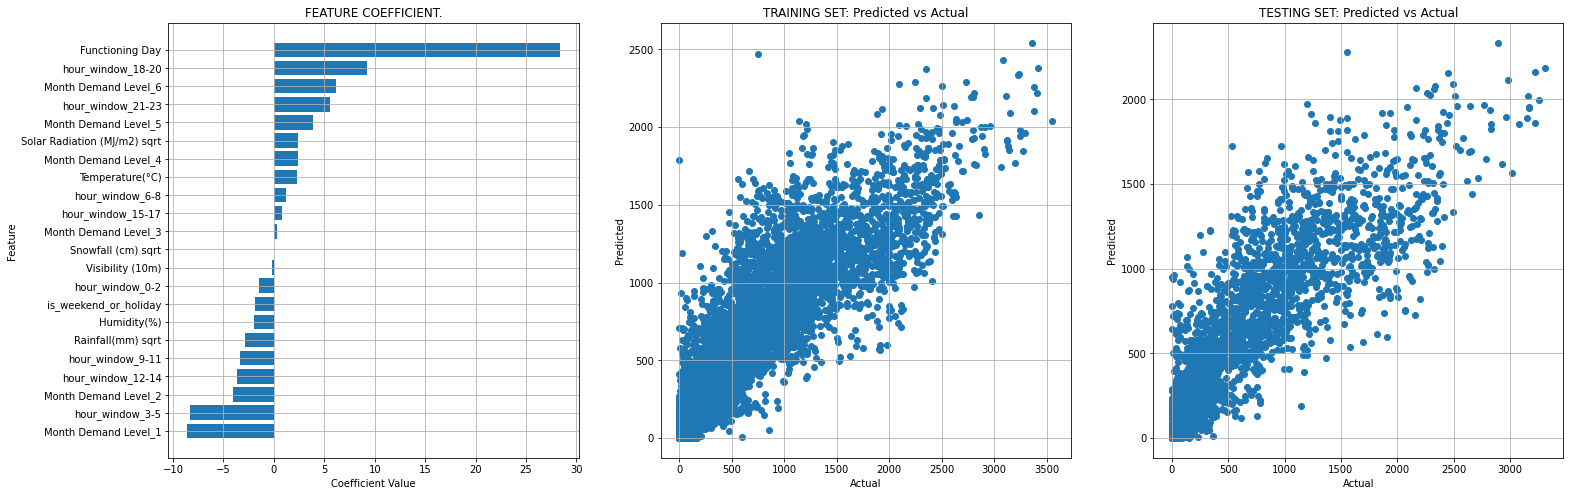

In [148]:
lin_reg = LinearRegression()
model_evaluation('Linear Regression',lin_reg,seoul_x_train,y_train,seoul_x_test,y_test)

In [ ]:
r2_df

model        r2    set
0  Linear Regression  0.721749  train
1  Linear Regression  0.701199   test

### **Ridge Regressor**

**** Results for RIDGE REGRESSION from Grid Search: **** 

 The best estimator across ALL searched params:
 Ridge(alpha=0.75)

 The best score across ALL searched params:
 -37.52785554820556

 The best parameters across ALL searched params:
 {'alpha': 0.75}
---------------------------------------------------------------------------

TRAINING SET:
---------------
R2 train (Ridge Regression): 0.7214
Adj. R2 train (Ridge Regression): 0.7204
MSE train (Ridge Regression): 115901.10252646104
RMSE train (Ridge Regression): 340.44250986981785
---------------------------------------------------------------------------

TESTING SET:
---------------
R2 test(Ridge Regression): 0.7009
Adj. R2 test (Ridge Regression): 0.6984
MSE test (Ridge Regression): 124279.19325231531
RMSE test (Ridge Regression): 352.5325421181927
---------------------------------------------------------------------------

Model Intecept:  -2.426954000006429


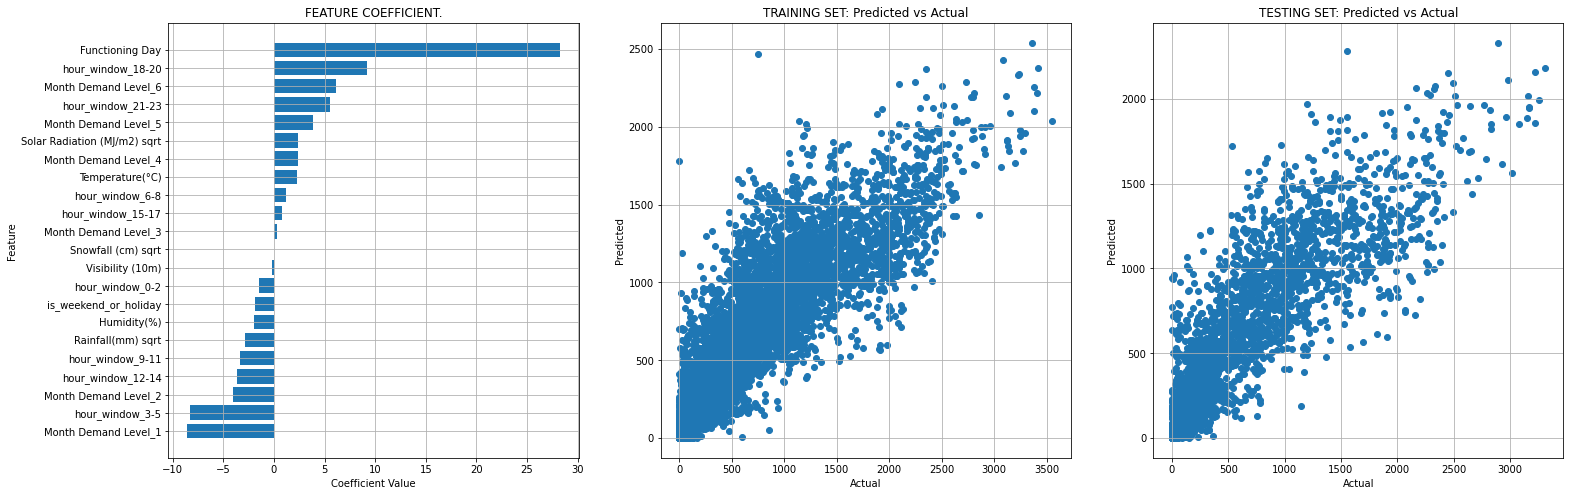

In [143]:
#ridge
ridge = Ridge()
parameters = {'alpha': [0.25,0.5,0.75,1,1.5,2,2.5,3,3.5,4]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
model_evaluation('Ridge Regression',ridge_regressor,seoul_x_train,y_train,seoul_x_test,y_test)

In [ ]:
r2_df

model        r2    set
0  Linear Regression  0.721749  train
1  Linear Regression  0.701199   test
2   Ridge Regression  0.721348  train
3   Ridge Regression  0.700852   test

### **LASSO Regressor**

**** Results for LASSO REGRESSION from Grid Search: **** 

 The best estimator across ALL searched params:
 Lasso(alpha=0.05)

 The best score across ALL searched params:
 -38.18322732425545

 The best parameters across ALL searched params:
 {'alpha': 0.05}
---------------------------------------------------------------------------

TRAINING SET:
---------------
R2 train (Lasso Regression): 0.7012
Adj. R2 train (Lasso Regression): 0.7001
MSE train (Lasso Regression): 124333.71527780485
RMSE train (Lasso Regression): 352.60986270636965
---------------------------------------------------------------------------

TESTING SET:
---------------
R2 test(Lasso Regression): 0.6815
Adj. R2 test (Lasso Regression): 0.6788
MSE test (Lasso Regression): 132341.22210040138
RMSE test (Lasso Regression): 363.7873308684641
---------------------------------------------------------------------------

Model Intecept:  0.32763746400800997


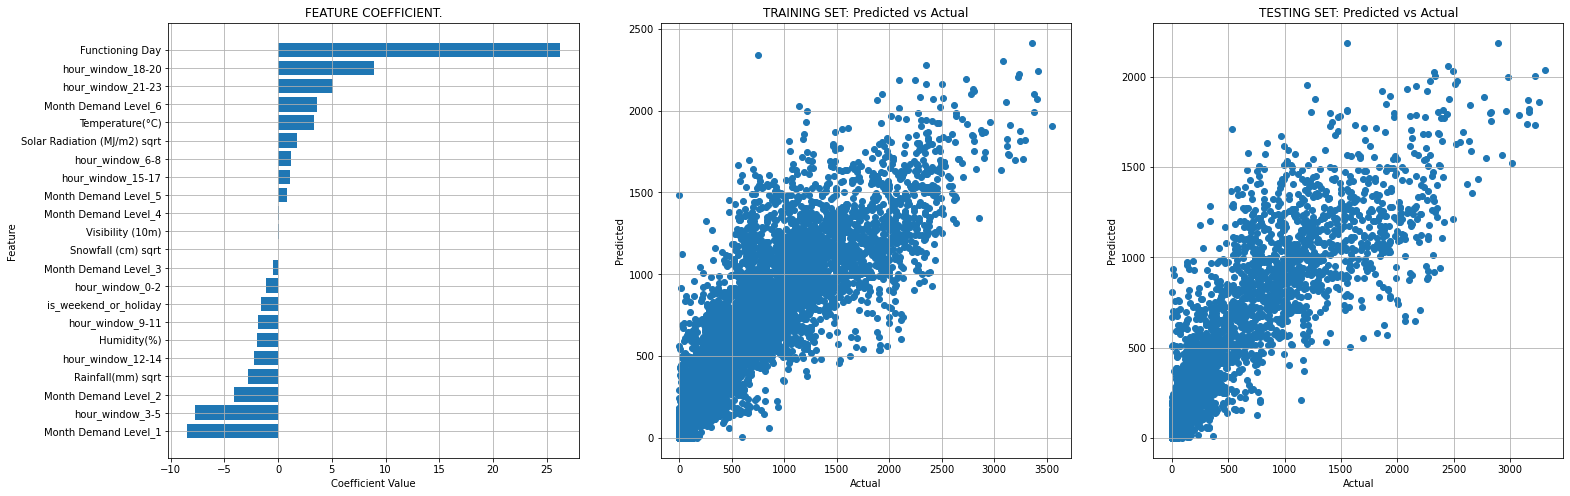

In [144]:
#lasso:

lasso = Lasso()
parameters = {'alpha': [0.05,0.1,0.25,0.5,0.75,1,1.5,2,2.5,3,3.5,4]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
model_evaluation('Lasso Regression',lasso_regressor,seoul_x_train,y_train,seoul_x_test,y_test)

# **2) TREE BASED MODELS:**

In [29]:
#creating a copy of data set for tree based models:
seoul_bike_data_tree1 = seoul_bike_data.copy()

#### Feature engineering for Tree Based Models :

In [31]:
# feature extraction:

seoul_bike_data_tree1["Date_Hour"] = pd.to_datetime(pd.to_datetime(seoul_bike_data_tree1.Date).dt.strftime('%d/%m/%Y')) #strftime converts date to string, so pd.to_datetime is applied again.

seoul_bike_data_tree1['Date_Hour'] +=  pd.to_timedelta(seoul_bike_data_tree1.Hour, unit='h') # adding hour detail to datetime as per hour given in 'hour' column, using pd.to_timedelta

seoul_bike_data_tree1.set_index('Date_Hour',inplace = True) #setting datetime as index

#extracting various units of time
seoul_bike_data_tree1['Year'] = seoul_bike_data_tree1.index.year
seoul_bike_data_tree1['Month'] = seoul_bike_data_tree1.index.month
seoul_bike_data_tree1['Weekday'] = seoul_bike_data_tree1.index.weekday
seoul_bike_data_tree1['Week'] = seoul_bike_data_tree1.index.week

# replacing holiday with no-holiday for 22/12/2017
seoul_bike_data_tree1["Holiday"] = np.where(seoul_bike_data_tree1["Date"] == "22/12/2017", "No Holiday", seoul_bike_data_tree1["Holiday"])

# Holiday [0,1] and Functioning Day [0,1]
seoul_bike_data_tree1['Holiday'] = seoul_bike_data_tree1['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)
seoul_bike_data_tree1['Functioning Day'] = seoul_bike_data_tree1['Functioning Day'].apply(lambda x: 1 if x == 'Yes' else 0) 

In [ ]:
seoul_bike_data_tree1.head()

Date  Rented Bike Count  Hour  Temperature(°C)  \
Date_Hour                                                                   
2017-12-01 00:00:00  01/12/2017                254     0             -5.2   
2017-12-01 01:00:00  01/12/2017                204     1             -5.5   
2017-12-01 02:00:00  01/12/2017                173     2             -6.0   
2017-12-01 03:00:00  01/12/2017                107     3             -6.2   
2017-12-01 04:00:00  01/12/2017                 78     4             -6.0   

                     Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Date_Hour                                                              
2017-12-01 00:00:00           37               2.2              2000   
2017-12-01 01:00:00           38               0.8              2000   
2017-12-01 02:00:00           39               1.0              2000   
2017-12-01 03:00:00           40               0.9              2000   
2017-12-01 04:00:00           36               2.3              2000   

                     Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Date_Hour                                                                 
2017-12-01 00:00:00                      -17.6                      0.0   
2017-12-01 01:00:00                      -17.6                      0.0   
2017-12-01 02:00:00                      -17.7                      0.0   
2017-12-01 03:00:00                      -17.6                      0.0   
2017-12-01 04:00:00                      -18.6                      0.0   

                     Rainfall(mm)  Snowfall (cm) Seasons  Holiday  \
Date_Hour                                                           
2017-12-01 00:00:00           0.0            0.0  Winter        0   
2017-12-01 01:00:00           0.0            0.0  Winter        0   
2017-12-01 02:00:00           0.0            0.0  Winter        0   
2017-12-01 03:00:00           0.0            0.0  Winter        0   
2017-12-01 04:00:00           0.0            0.0  Winter        0   

                     Functioning Day  Year  Month  Weekday  Week  
Date_Hour                                                         
2017-12-01 00:00:00                1  2017     12        4    48  
2017-12-01 01:00:00                1  2017     12        4    48  
2017-12-01 02:00:00                1  2017     12        4    48  
2017-12-01 03:00:00                1  2017     12        4    48  
2017-12-01 04:00:00                1  2017     12        4    48

* #### We don't need Date column as we have extracted the various date informations and decision tree using every unique date doesn't make sense as we will be forecasting for future. 
* #### We will also not be using Year column because we only have data for duration of 1 year starting from December 2017 to November 2018.

In [32]:
#dropping Date and Year column
seoul_bike_data_tree1 = seoul_bike_data_tree1.drop(['Date','Year','Seasons'], axis=1)

In [34]:
# train test split:

X_tree = seoul_bike_data_tree1.drop(['Rented Bike Count'], axis=1).copy()
Y_tree = seoul_bike_data['Rented Bike Count'].copy()

from sklearn.model_selection import train_test_split 
x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split( X_tree,Y_tree , test_size = 0.3,shuffle = True ,random_state = 3) 
print(x_train_tree.shape)
print(x_test_tree.shape)
print(y_train_tree.shape)
print(y_test_tree.shape)

(6132, 14)
(2628, 14)
(6132,)
(2628,)


### **Decision Tree Regressor**

In [152]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state = 0) 

**** Results for DECISION TREE REGRESSION from Grid Search: **** 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(max_depth=13, min_samples_leaf=6, min_samples_split=10,
                      random_state=0)

 The best score across ALL searched params:
 0.8566383687906614

 The best parameters across ALL searched params:
 {'max_depth': 13, 'min_samples_leaf': 6, 'min_samples_split': 10}
---------------------------------------------------------------------------

TRAINING SET:
---------------
R2 train (Decision Tree Regression): 0.9083
Adj. R2 train (Decision Tree Regression): 0.9081
MSE train (Decision Tree Regression): 24561.641658457193
RMSE train (Decision Tree Regression): 156.72154178177675
---------------------------------------------------------------------------

TESTING SET:
---------------
R2 test(Decision Tree Regression): 0.8122
Adj. R2 test (Decision Tree Regression): 0.8112
MSE test (Decision Tree Regression): 52126.8679454027
RMSE test (Decision T

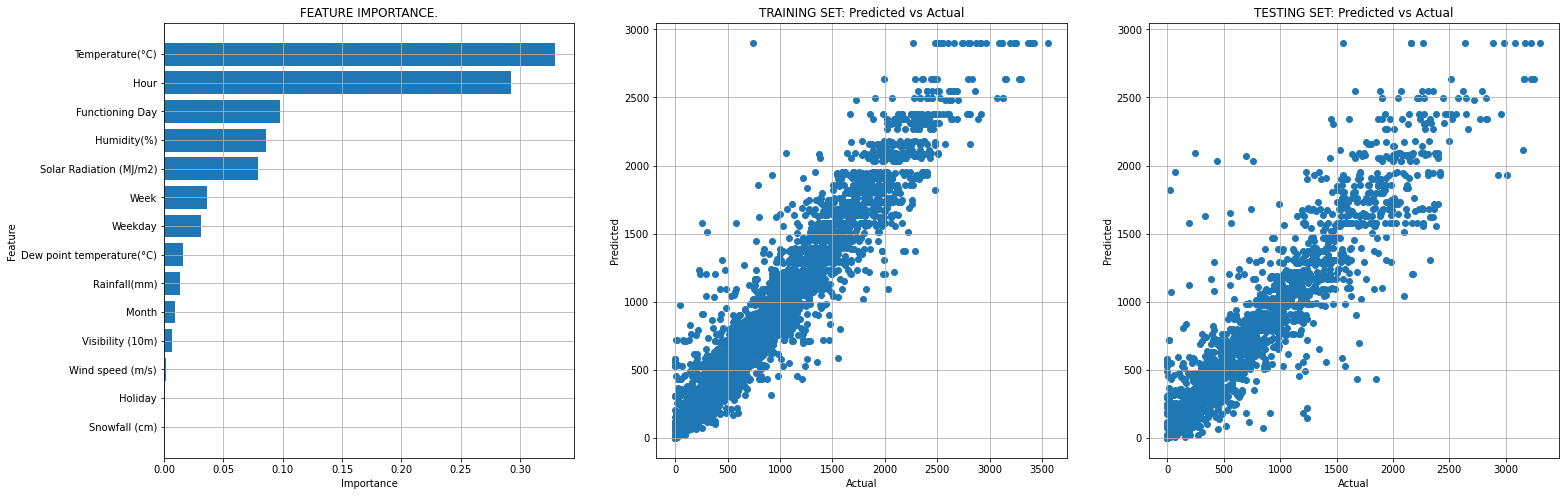

In [163]:
dtr_params = {'max_depth' : [11,12,13] , 'min_samples_split':[10,11,12],'min_samples_leaf': [5,6,7]
                 }
seoul_dtr_cv= GridSearchCV(estimator=dtr, param_grid = dtr_params, cv = 5)

model_evaluation('Decision Tree Regression',seoul_dtr_cv,x_train_tree,y_train_tree,x_test_tree,y_test_tree)

### **Gradient Boosting Regressor**

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state = 0)

**** Results for GRADIENT BOOSTING REGRESSOR from Grid Search: **** 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(max_depth=7, max_features=10, min_samples_leaf=5,
                          min_samples_split=11, n_estimators=115,
                          random_state=0)

 The best score across ALL searched params:
 0.9399319328764018

 The best parameters across ALL searched params:
 {'max_depth': 7, 'max_features': 10, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 115}
---------------------------------------------------------------------------

TRAINING SET:
---------------
R2 train (Gradient Boosting Regressor): 0.9825363497633547
Adj. R2 train (Gradient Boosting Regressor): 0.9824963806439639
MSE train (Gradient Boosting Regressor): 7266.369620225589
RMSE train (Gradient Boosting Regressor): 85.24300335057177
---------------------------------------------------------------------------

TESTING SET:
---------------
R2 test(Gradient Boo

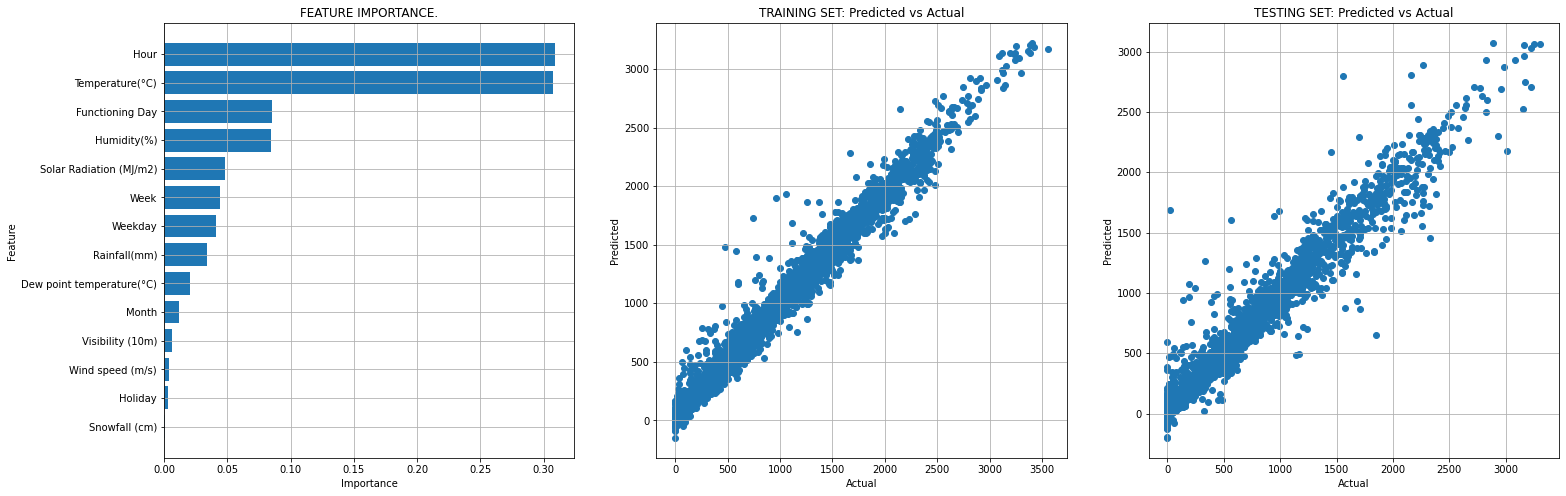

In [38]:
gbr_params = {'n_estimators' : [105,110,115],'max_depth' : [5,6,7] , 'min_samples_split':[9,10,11], 'min_samples_leaf': [4,5,6], 'max_features':[10,12]
              }
seoul_gbr_cv= GridSearchCV(estimator=gbr, param_grid = gbr_params, cv = 5)
              
model_evaluation('Gradient Boosting Regressor',seoul_gbr_cv,x_train_tree,y_train_tree,x_test_tree,y_test_tree)

### **Random Forest Regressor**

In [150]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()

**** Results for RANDOM FOREST REGRESSOR from Grid Search: **** 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=11, max_features=12, min_samples_leaf=4,
                      min_samples_split=8, n_estimators=105)

 The best score across ALL searched params:
 0.9054652452040791

 The best parameters across ALL searched params:
 {'max_depth': 11, 'max_features': 12, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 105}
---------------------------------------------------------------------------

TRAINING SET:
---------------
R2 train (Random Forest Regressor): 0.8934
Adj. R2 train (Random Forest Regressor): 0.8932
MSE train (Random Forest Regressor): 23024.777794160032
RMSE train (Random Forest Regressor): 151.73917686003188
---------------------------------------------------------------------------

TESTING SET:
---------------
R2 test(Random Forest Regressor): 0.8488
Adj. R2 test (Random Forest Regressor): 0.848
MSE test (Random Forest R

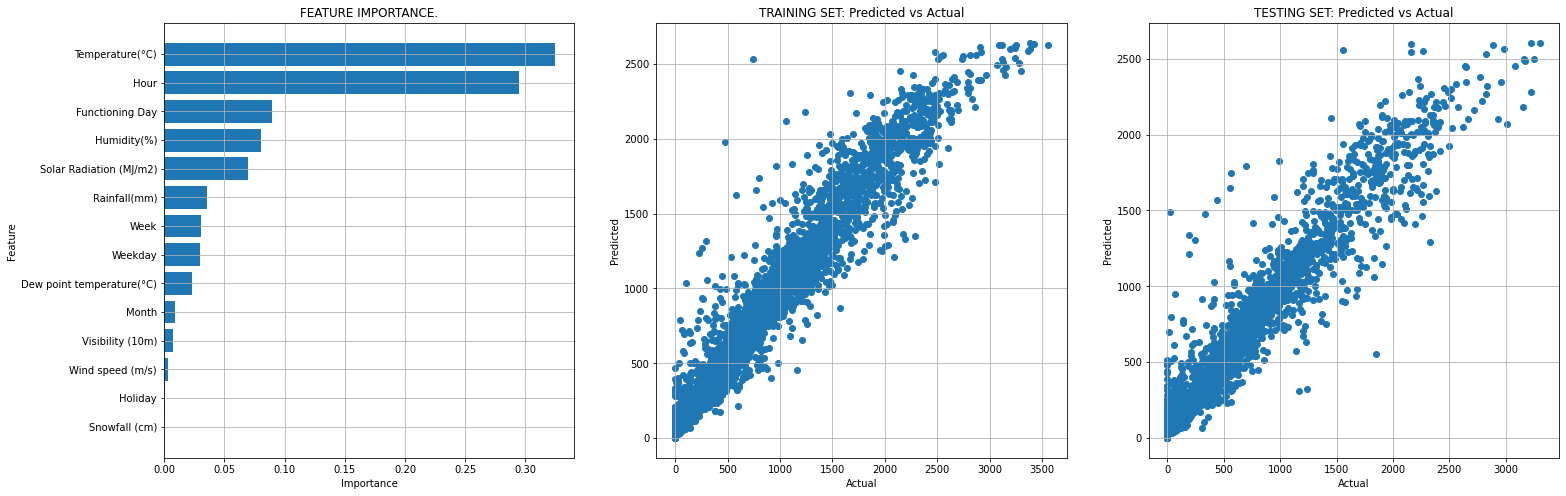

In [151]:
rfg_params = {'n_estimators' : [103,105,107],'max_depth' : [9,10,11] , 'min_samples_split':[8,10,12], 'min_samples_leaf': [4,5,6],'max_features':[10,12]
                 }
seoul_rfg_cv= GridSearchCV(estimator=rfg, param_grid = rfg_params, cv = 5)
model_evaluation('Random Forest Regressor',seoul_rfg_cv,x_train_tree,y_train_tree,x_test_tree,y_test_tree)

### **XG Boost Regressor**

In [154]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(objective ='reg:squarederror')

**** Results for XG BOOST REGRESSOR from Grid Search: **** 

 The best estimator across ALL searched params:
 XGBRegressor(colsample_bytree=0.85, max_depth=9, n_estimators=115,
             objective='reg:squarederror', reg_lambda=2.75)

 The best score across ALL searched params:
 0.9425927516753229

 The best parameters across ALL searched params:
 {'colsample_bytree': 0.85, 'max_depth': 9, 'n_estimators': 115, 'reg_lambda': 2.75}
---------------------------------------------------------------------------

TRAINING SET:
---------------
R2 train (XG Boost Regressor): 0.9927
Adj. R2 train (XG Boost Regressor): 0.9927
MSE train (XG Boost Regressor): 1904.6984635622528
RMSE train (XG Boost Regressor): 43.64285123089751
---------------------------------------------------------------------------

TESTING SET:
---------------
R2 test(XG Boost Regressor): 0.9234
Adj. R2 test (XG Boost Regressor): 0.923
MSE test (XG Boost Regressor): 20645.472541023806
RMSE test (XG Boost Regressor): 143.6853

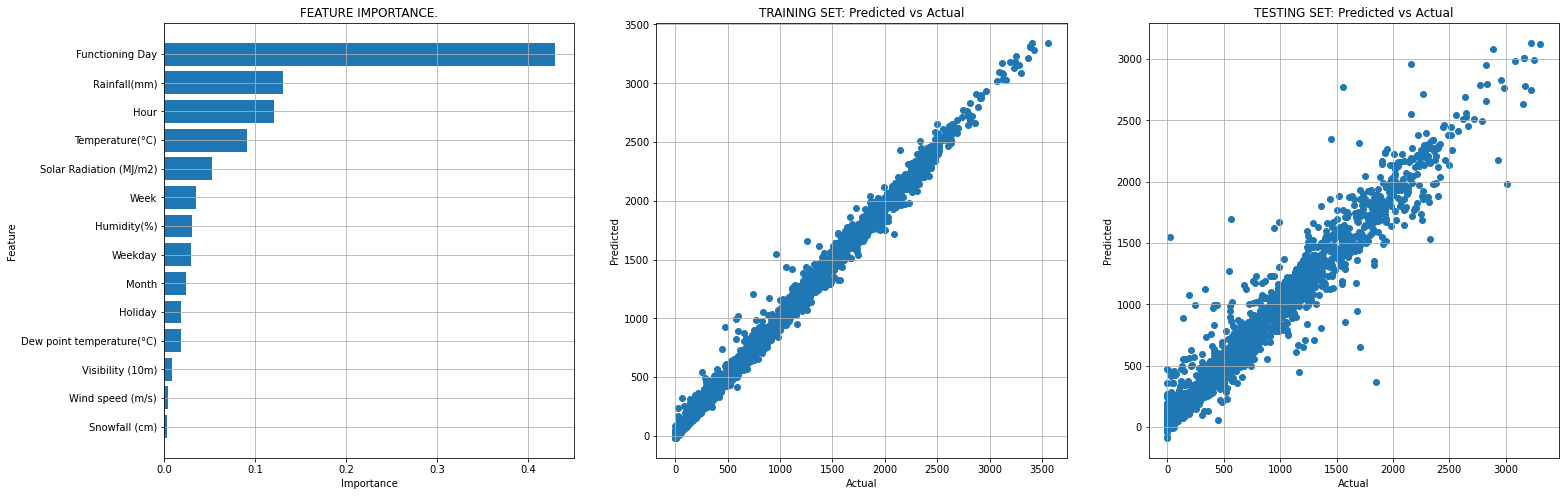

In [164]:
params = { 'n_estimators' : [111,113,115],'max_depth' : [7,8,9], 'colsample_bytree':[0.7,0.85], 'reg_lambda':[2.25,2.5,2.75] }

xgbr_cv = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   cv=5)

model_evaluation('XG Boost Regressor',xgbr_cv,x_train_tree,y_train_tree,x_test_tree,y_test_tree)

### **Model Peformance Comparison**

In [165]:
r2_df

model        r2    set
0             Linear Regression  0.721700  train
1             Linear Regression  0.701200   test
2              Ridge Regression  0.721400  train
3              Ridge Regression  0.700900   test
4              Lasso Regression  0.701200  train
5              Lasso Regression  0.681500   test
6      Decision Tree Regression  0.908300  train
7      Decision Tree Regression  0.812200   test
8   Gradient Boosting Regressor  0.982536  train
9   Gradient Boosting Regressor  0.947354   test
10      Random Forest Regressor  0.893400  train
11      Random Forest Regressor  0.848800   test
12           XG Boost Regressor  0.992700  train
13           XG Boost Regressor  0.923400   test

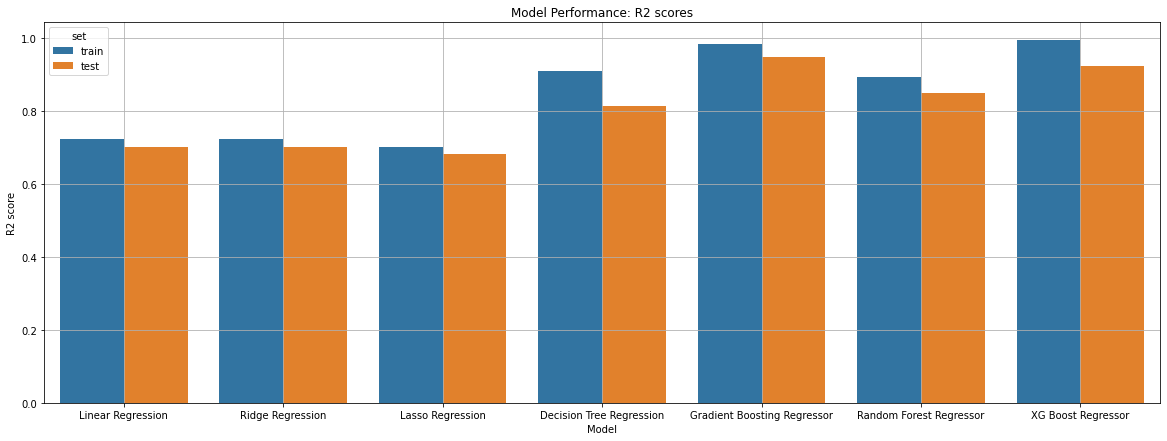

In [174]:
plt.figure(figsize=(20, 7))
sns.barplot(x='model',y='r2', data = r2_df, hue='set')
plt.title('Model Performance: R2 scores')
plt.xlabel('Model')
plt.ylabel('R2 score')
plt.grid(which='both')